# Predict Bike Sharing Demand with AutoGluon

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
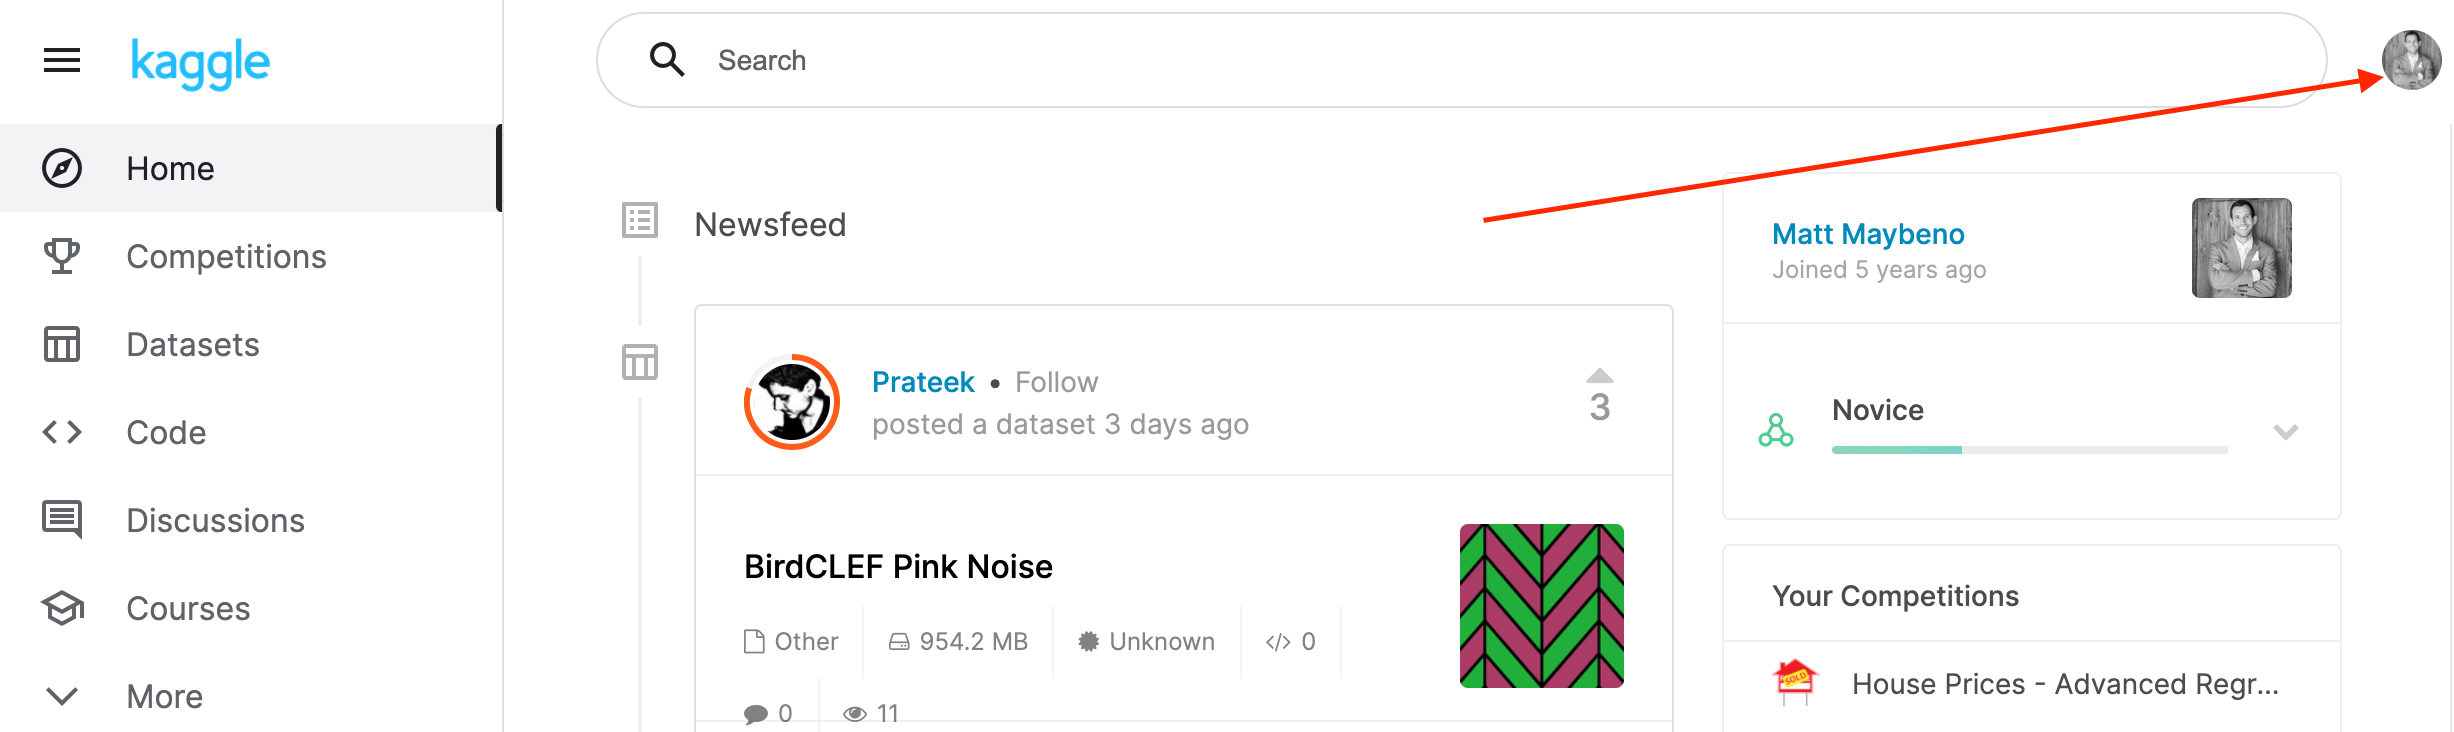
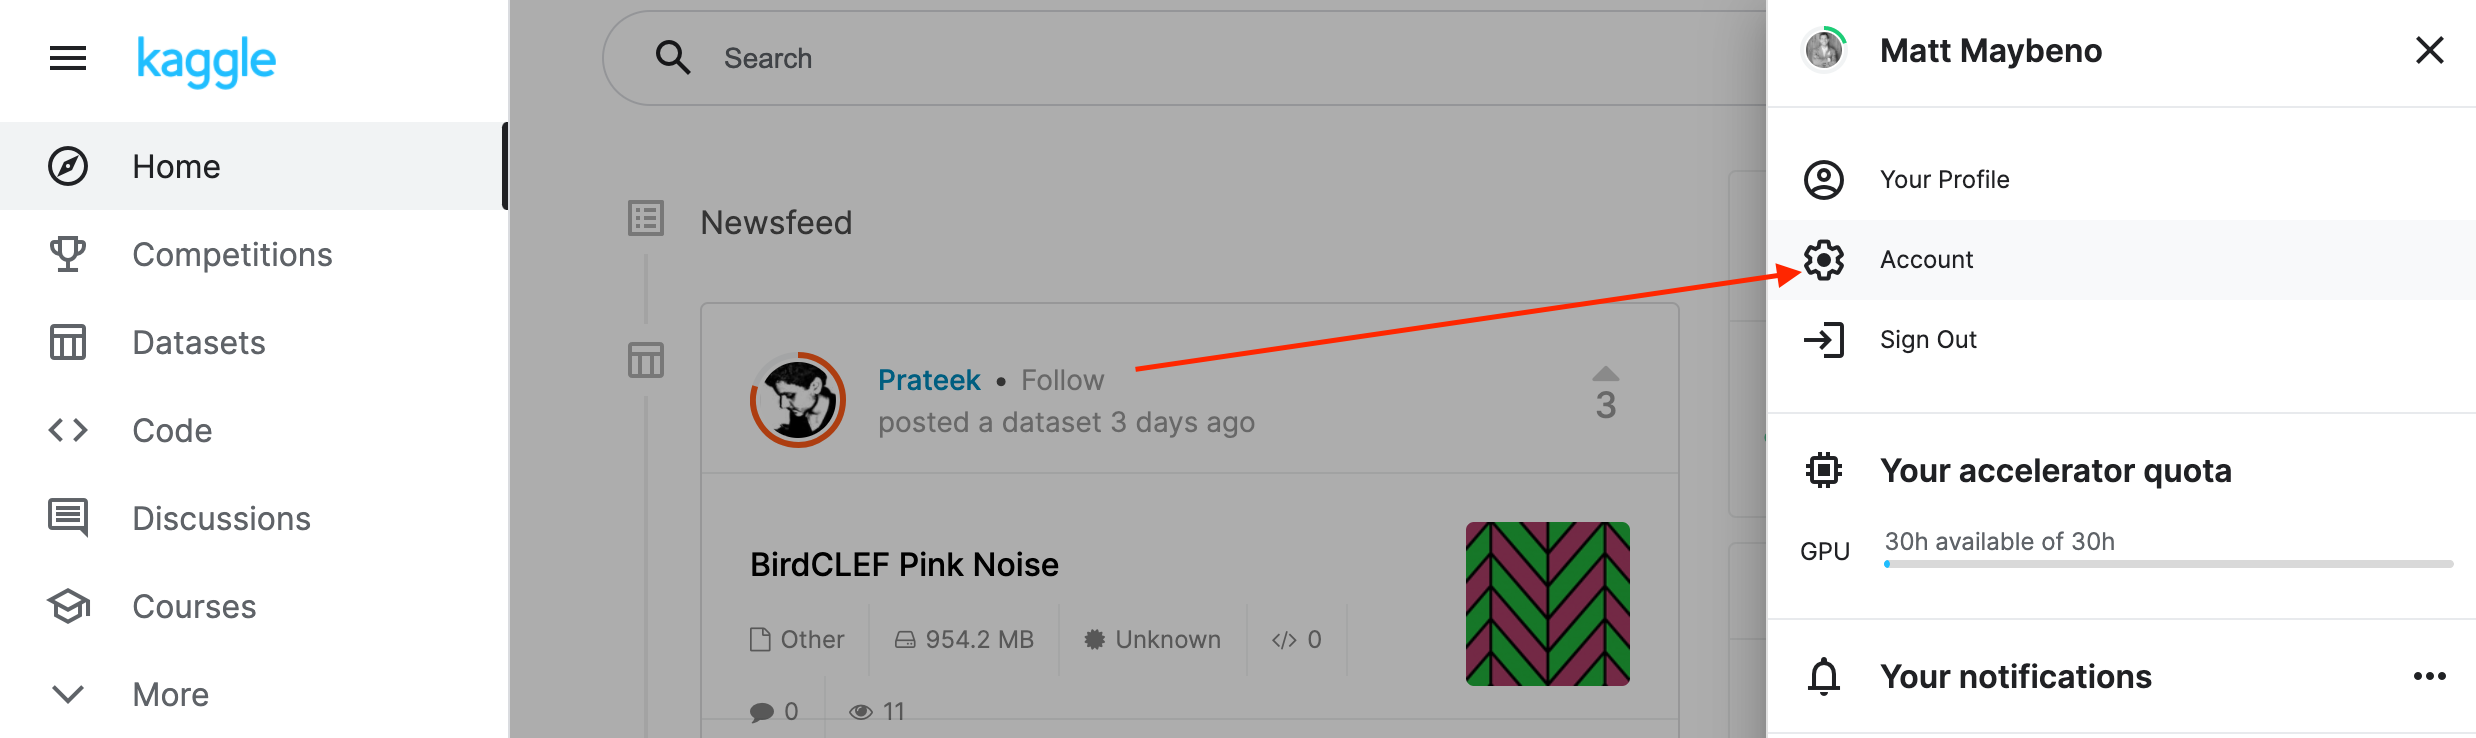
2. Scroll down to API and click Create New API Token.
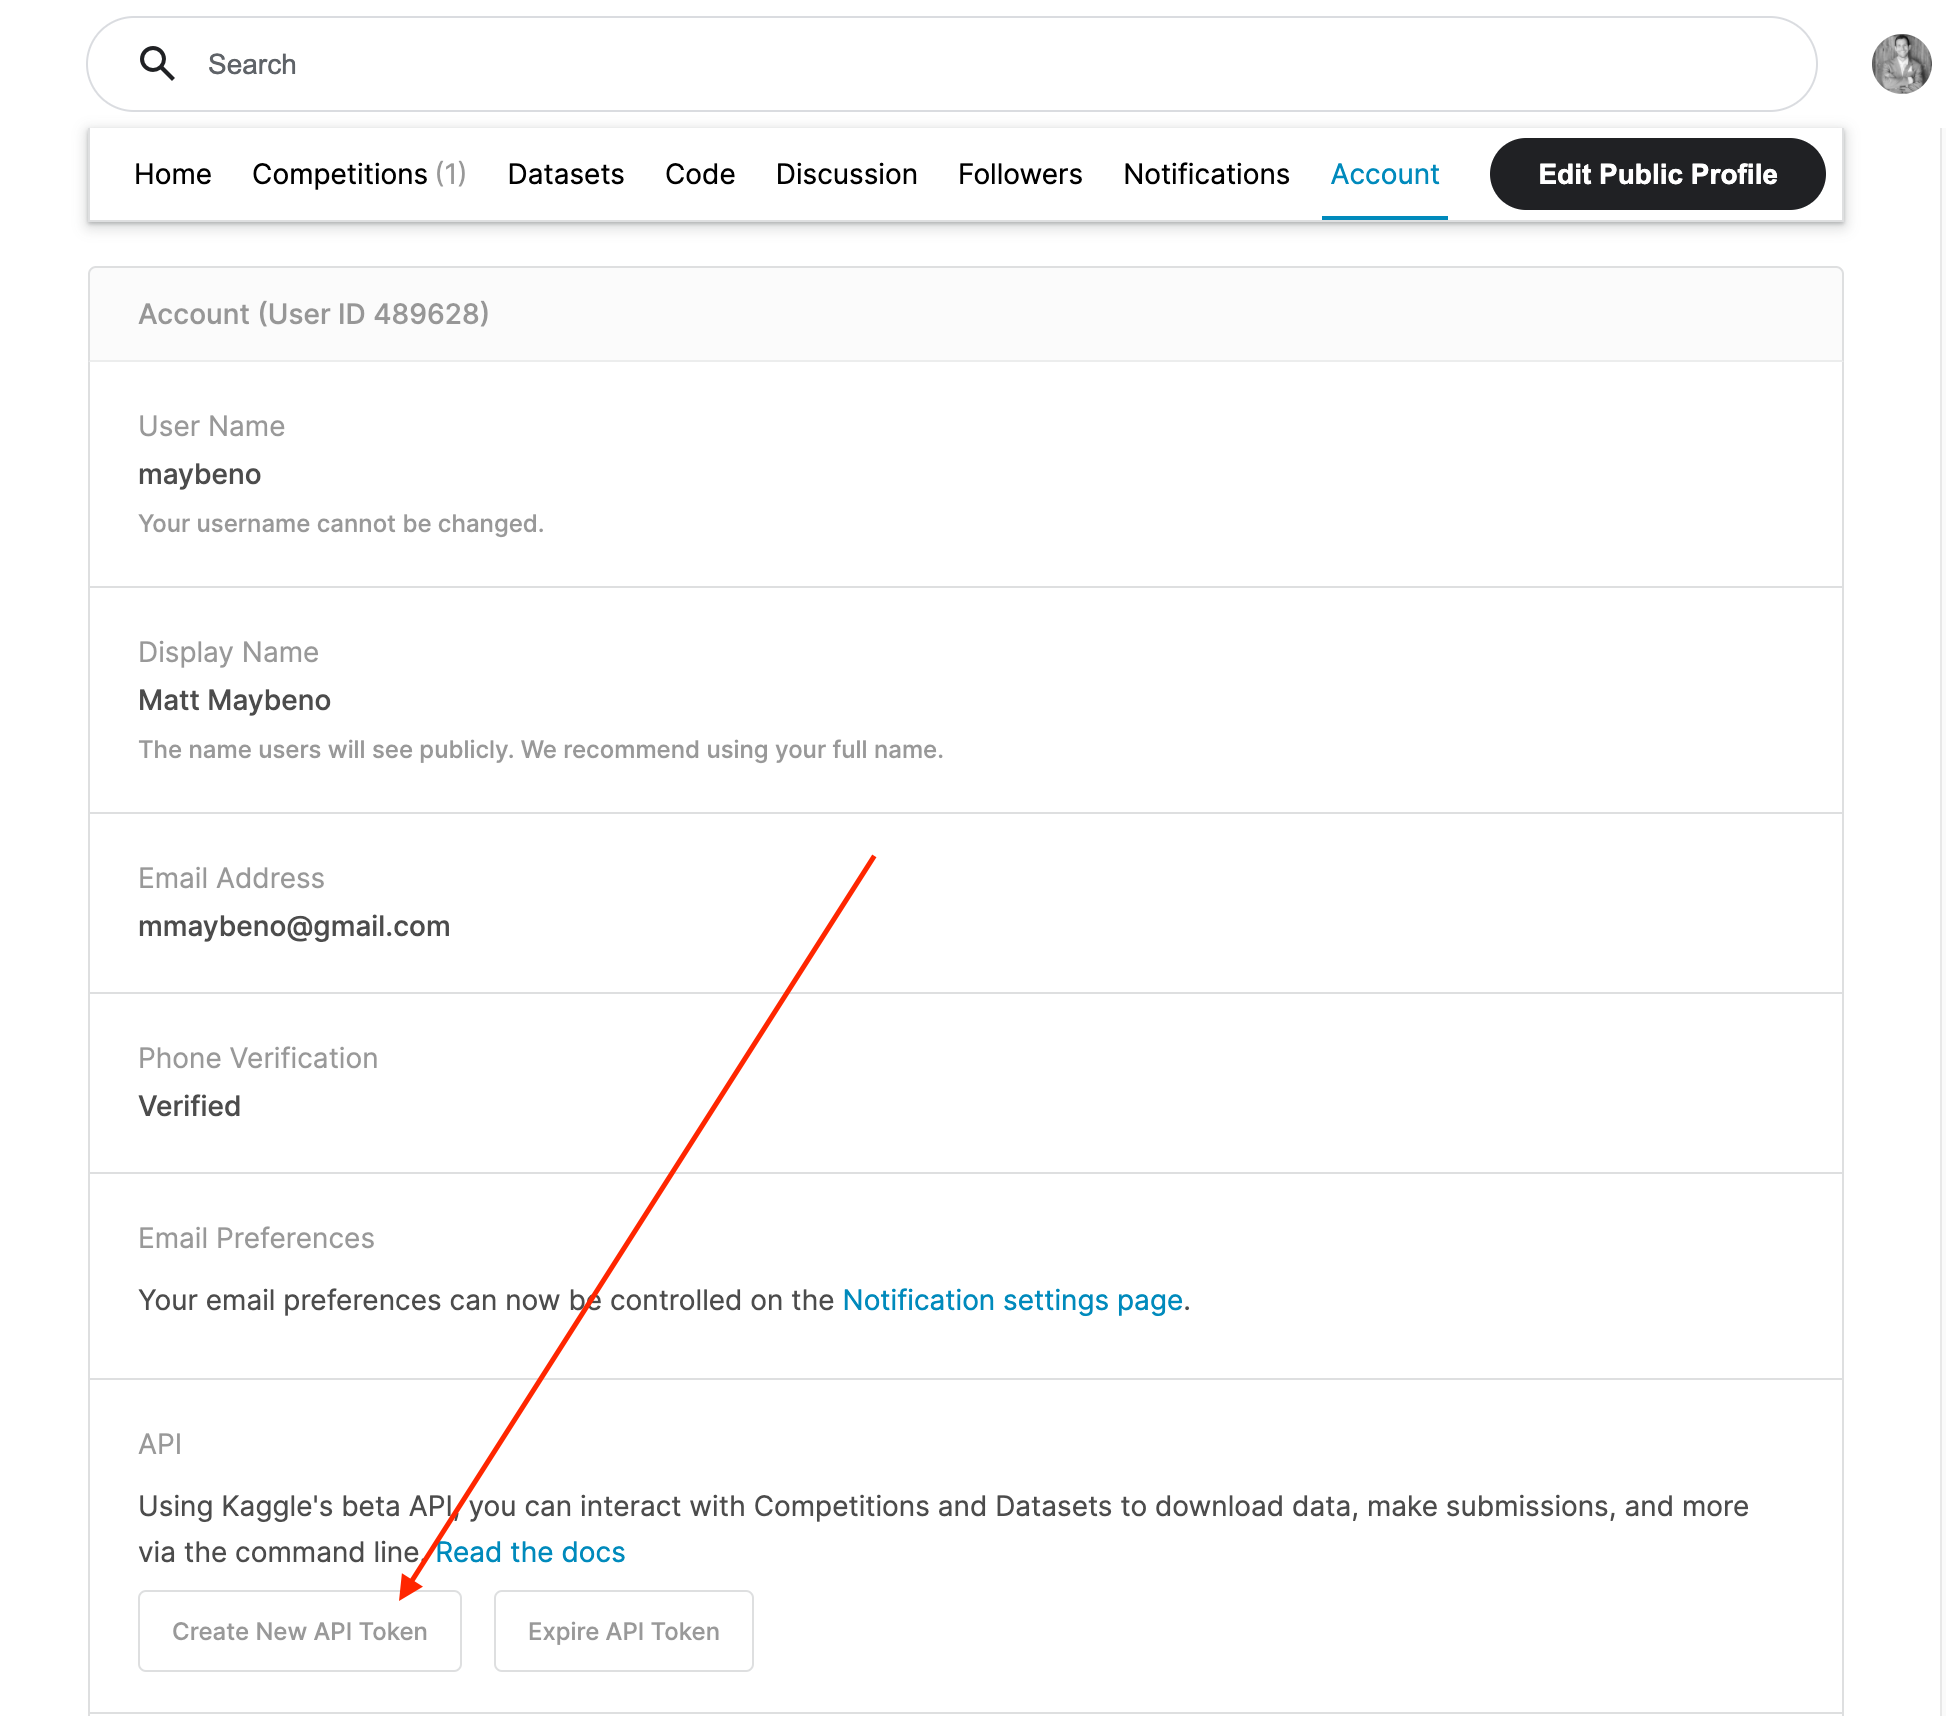
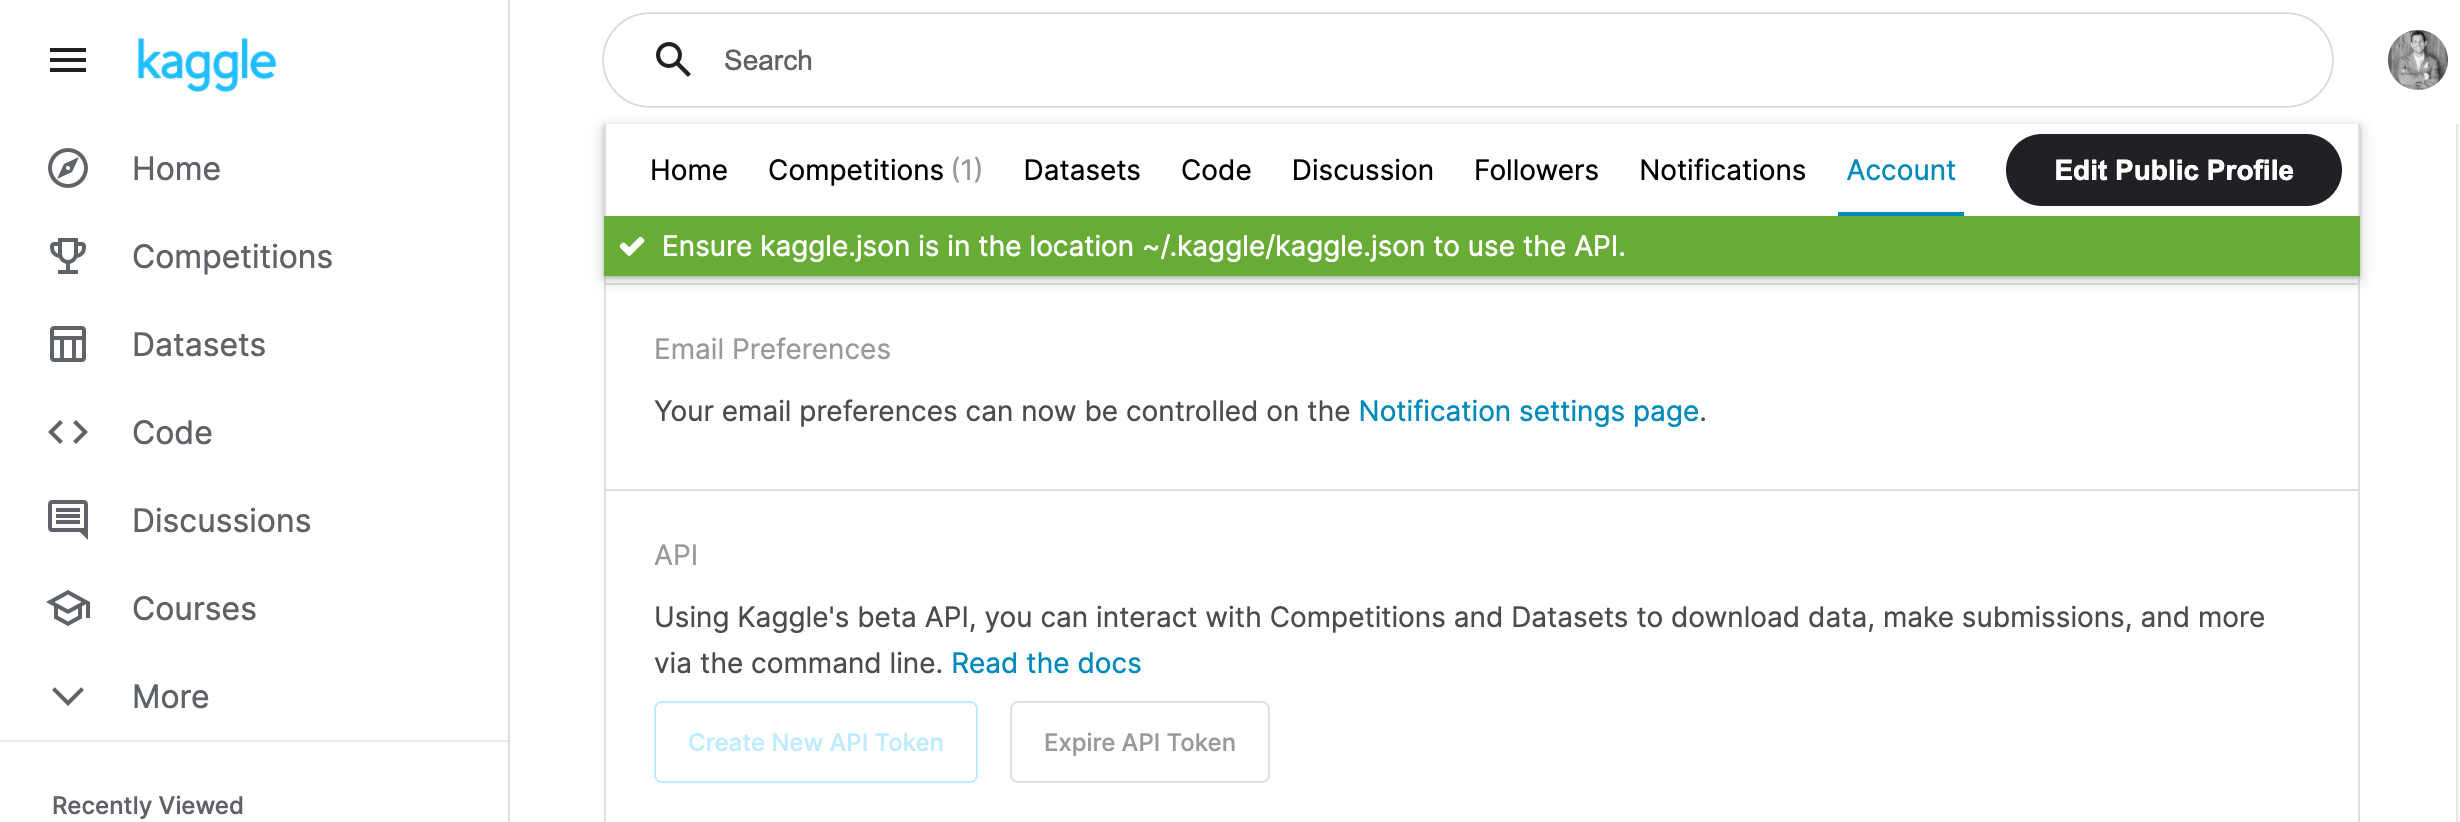
3. Open up `kaggle.json` and use the username and key.
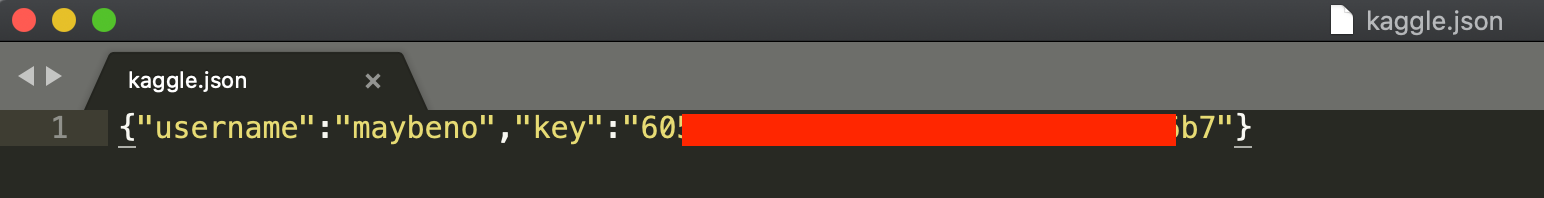

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [2]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
!pip install kaggle
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Using cached pip-22.3.1-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 21.3.1
    Uninstalling pip-21.3.1:
      Successfully uninstalled pip-21.3.1
  Using cached setuptools-65.6.3-py3-none-any.whl (1.2 MB)
  Using cached wheel-0.38.4-py3-none-any.whl (36 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 59.4.0
    Uninstalling setuptools-59.4.0:
      Successfully uninstalled setuptools-59.4.0
  Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl (49.1 MB)
  Using cached bokeh-2.0.1-py3-none-any.whl
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.4.2
    Uninstalling bokeh-2.4.2:
      Successfully uninstalled bokeh-2.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.0/286.0 kB 124.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 198.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 172.7 MB/s eta 0:00:00
     ━━━━━━━━━━━

### Setup Kaggle API Key

In [3]:
# create the .kaggle directory and an empty kaggle.json file

!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

# !mkdir -p /Users/narmina/.kaggle
# !touch /Users/narmina/.kaggle/kaggle.json
# !chmod 600 /Users/narmina/.kaggle/kaggle.json

In [4]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "nayayyc"
kaggle_key = "fa9bd198433174b4a6edb2f7620a6e62"

# Save API token the kaggle.json file
# with open("/Users/narmina/.kaggle/kaggle.json", "w") as f:
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
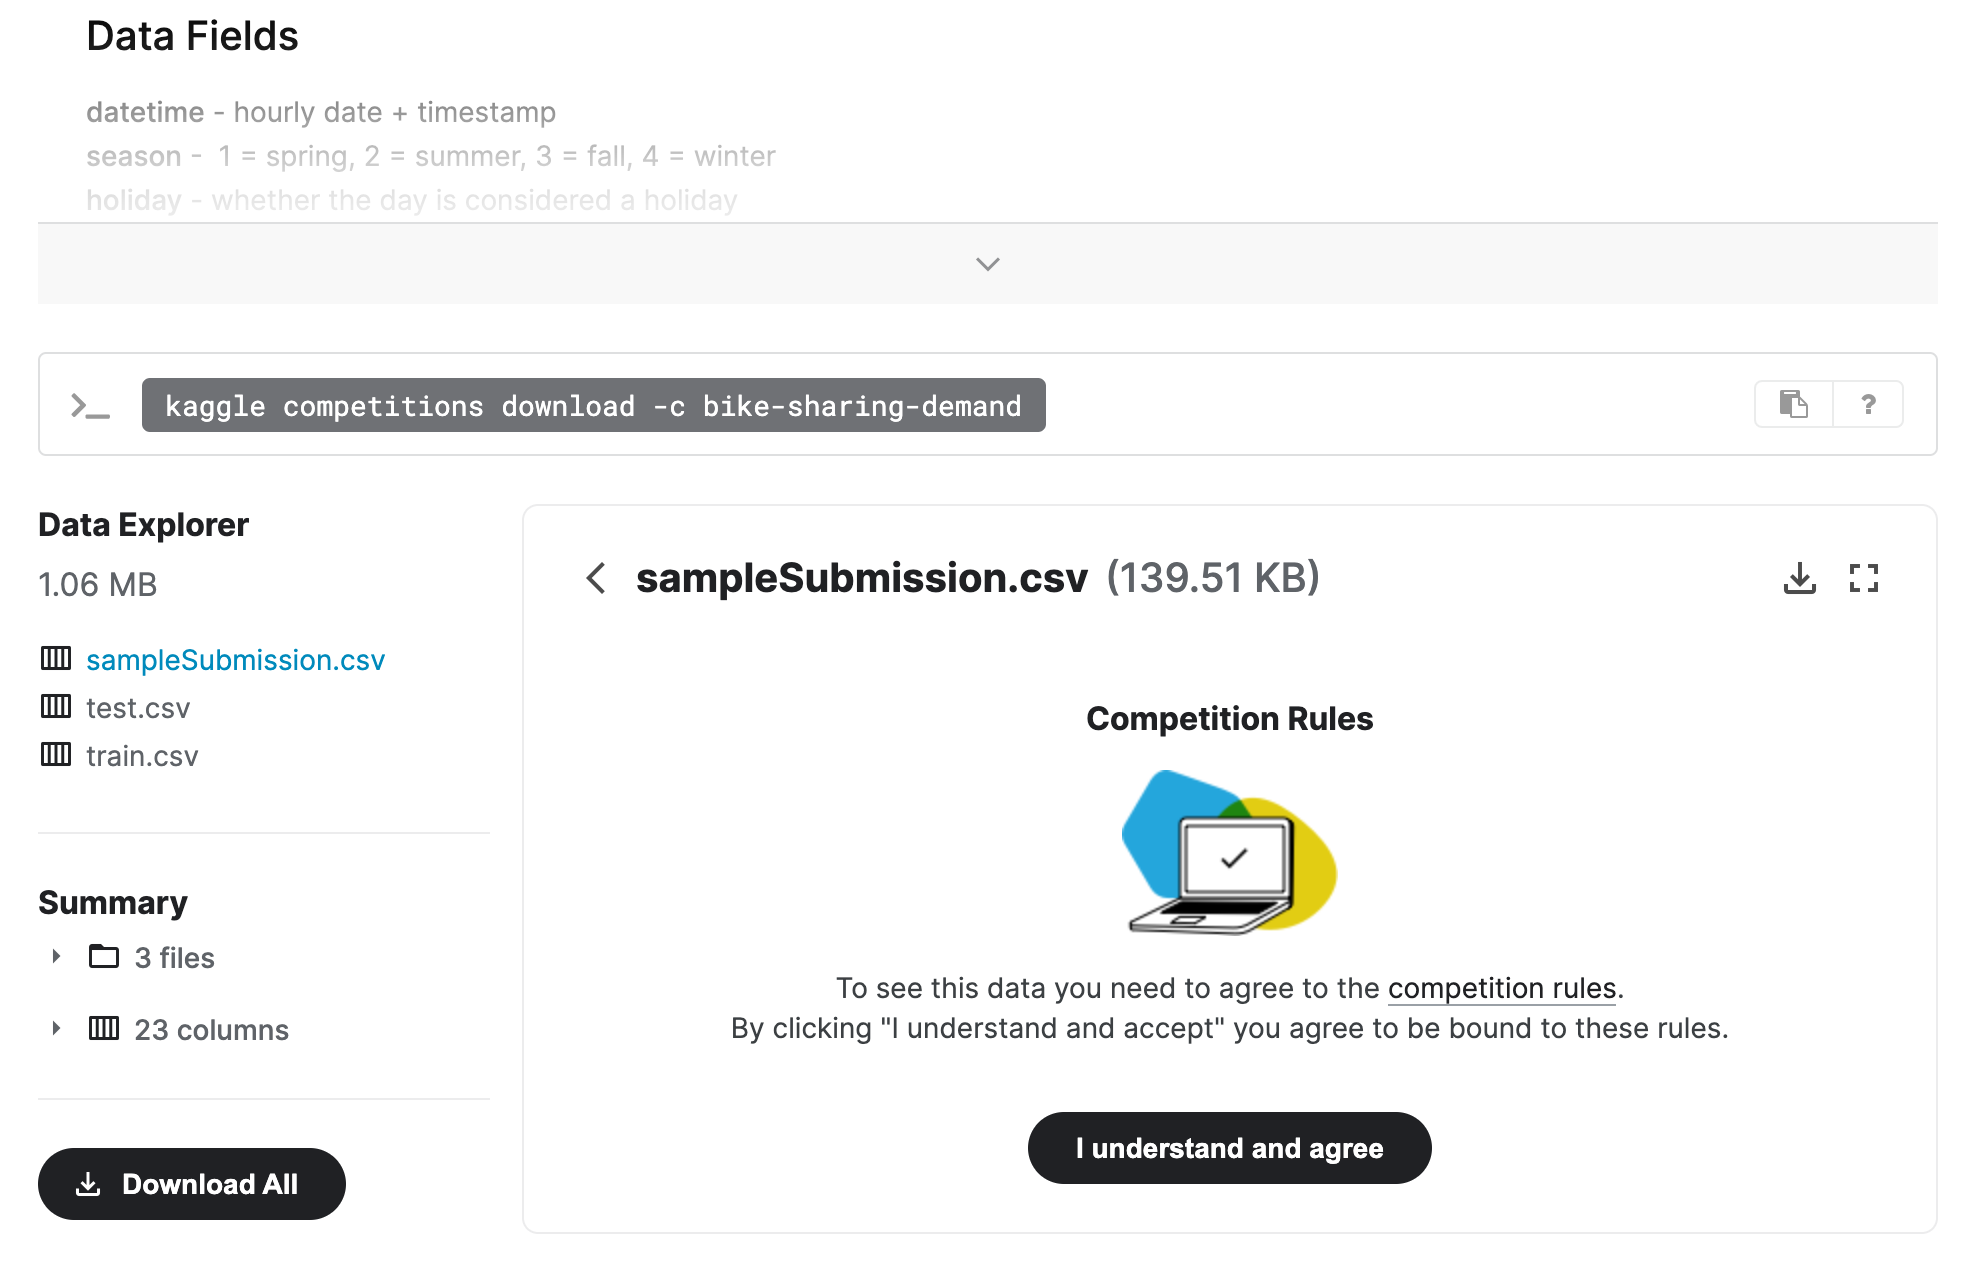

In [5]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0%|                                                | 0.00/189k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 189k/189k [00:00<00:00, 7.05MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from autogluon.tabular import TabularPredictor

/usr/local/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv")
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [7]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [8]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [10]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv")
test.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1  2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2  2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3  2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4  2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014

In [11]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [12]:
test.describe()

season      holiday   workingday      weather         temp  \
count  6493.000000  6493.000000  6493.000000  6493.000000  6493.000000   
mean      2.493300     0.029108     0.685815     1.436778    20.620607   
std       1.091258     0.168123     0.464226     0.648390     8.059583   
min       1.000000     0.000000     0.000000     1.000000     0.820000   
25%       2.000000     0.000000     0.000000     1.000000    13.940000   
50%       3.000000     0.000000     1.000000     1.000000    21.320000   
75%       3.000000     0.000000     1.000000     2.000000    27.060000   
max       4.000000     1.000000     1.000000     4.000000    40.180000   

             atemp     humidity    windspeed  
count  6493.000000  6493.000000  6493.000000  
mean     24.012865    64.125212    12.631157  
std       8.782741    19.293391     8.250151  
min       0.000000    16.000000     0.000000  
25%      16.665000    49.000000     7.001500  
50%      25.000000    65.000000    11.001400  
75%      31.060000    81.000000    16.997900  
max      50.000000   100.000000    55.998600

In [13]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv")
submission.head()

datetime  count
0  2011-01-20 00:00:00      0
1  2011-01-20 01:00:00      0
2  2011-01-20 02:00:00      0
3  2011-01-20 03:00:00      0
4  2011-01-20 04:00:00      0

In [14]:
submission.describe()

count
count  6493.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0

## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

### Experiment 1. Default configuration, no feature engineering.

In [21]:
# Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20

In [15]:
## I will be dropping these two columns as they are not present in test dataset instead of ignoring columns. 
train.drop(columns=['casual','registered'], inplace = True )

In [16]:
predictor = TabularPredictor(
    label='count', 
    eval_metric = 'root_mean_squared_error',
).fit(
    train_data = train,
    # ignored_columns = ['casual','registered'],
    time_limit = 600, 
    presets='best_quality'
)

No path specified. Models will be saved in: "AutogluonModels/ag-20221226_115948/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20221226_115948/"
AutoGluon Version:  0.6.1
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 26 20:36:53 UTC 2022
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fea

### Review AutoGluon's training run with ranking of models that did the best.

In [17]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.109600      14.614315  553.148430                0.001307           0.387465            3       True         14
1   RandomForestMSE_BAG_L2  -53.406479      10.585600  411.811534                0.637849          26.515250            2       True         12
2          LightGBM_BAG_L2  -55.217867      10.165047  411.070628                0.217296          25.774344            2       True         11
3          CatBoost_BAG_L2  -55.744445      10.012650  444.625488                0.064899          59.329205            2       True         13
4        LightGBMXT_BAG_L2  -60.394630      13.692964  441.142166                3.745213          55.845882            2       True         10
5    KNeighborsDist_BAG_L1  -84.125061       0.103698    0.029283         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54

In [18]:
predictor.leaderboard(silent=True)

model   score_val  pred_time_val    fit_time  \
0      WeightedEnsemble_L3  -53.109600      14.614315  553.148430   
1   RandomForestMSE_BAG_L2  -53.406479      10.585600  411.811534   
2          LightGBM_BAG_L2  -55.217867      10.165047  411.070628   
3          CatBoost_BAG_L2  -55.744445      10.012650  444.625488   
4        LightGBMXT_BAG_L2  -60.394630      13.692964  441.142166   
5    KNeighborsDist_BAG_L1  -84.125061       0.103698    0.029283   
6      WeightedEnsemble_L2  -84.125061       0.104856    0.556873   
7    KNeighborsUnif_BAG_L1 -101.546199       0.103664    0.031033   
8   RandomForestMSE_BAG_L1 -116.544294       0.569369   10.905250   
9     ExtraTreesMSE_BAG_L1 -124.588053       0.554608    5.158636   
10         CatBoost_BAG_L1 -130.533194       0.177396  201.808275   
11         LightGBM_BAG_L1 -131.054162       1.472807   30.420964   
12       LightGBMXT_BAG_L1 -131.460909       6.551322   65.351942   
13  NeuralNetFastAI_BAG_L1 -138.372209       0.414887   71.590901   

    pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                 0.001307           0.387465            3       True   
1                 0.637849          26.515250            2       True   
2                 0.217296          25.774344            2       True   
3                 0.064899          59.329205            2       True   
4                 3.745213          55.845882            2       True   
5                 0.103698           0.029283            1       True   
6                 0.001159           0.527590            2       True   
7                 0.103664           0.031033            1       True   
8                 0.569369          10.905250            1       True   
9                 0.554608           5.158636            1       True   
10                0.177396         201.808275            1       True   
11                1.472807          30.420964            1       True   
12                6.551322          65.351942            1       True   
13                0.414887          71.590901            1       True   

    fit_order  
0          14  
1          12  
2          11  
3          13  
4          10  
5           2  
6           9  
7           1  
8           5  
9           7  
10          6  
11          4  
12          3  
13          8

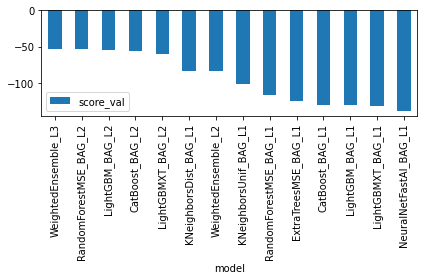

In [183]:
fig = predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val").figure
fig.tight_layout()
fig.savefig('img/exp_1_leaderboard.png')

### Create predictions from test dataset

In [20]:
predictions = predictor.predict(test)
predictions.head()

0    23.355633
1    41.986988
2    45.374504
3    49.315769
4    52.064514
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [21]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.940247
std        89.856956
min         3.016292
25%        20.067400
50%        64.116325
75%       167.614639
max       365.451843
Name: count, dtype: float64

In [22]:
# How many negative values do we have?
(predictions<0).sum()

0

In [47]:
# All values are non-negative - nothing to worry about

### Set predictions to submission dataframe, save, and submit

In [23]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [24]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "initial submission 1"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 316kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [25]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                        date                 description                                                                                                                                                                                                                                           status    publicScore  privateScore  
------------------------------  -------------------  ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  --------  -----------  ------------  
submission.csv                  2022-12-26 12:10:34  initial submission 1                                                                                                                                                                                                                                  complete  1.79067      1.79

#### Initial score of 1.79642

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

### Distribution analysis

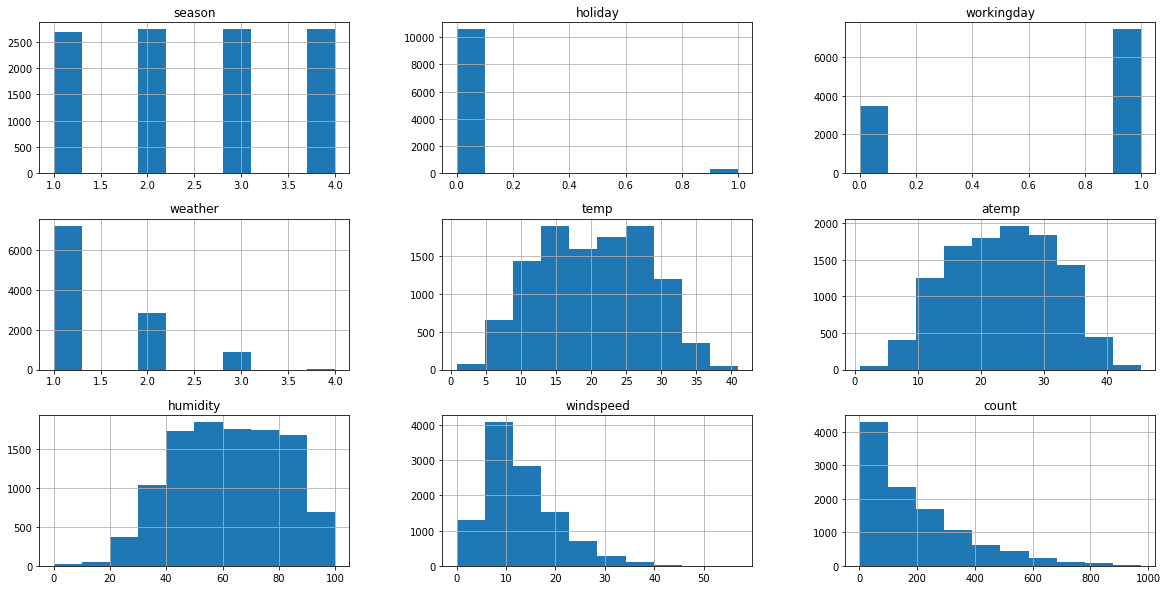

In [26]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploratory data analysis
train.hist(figsize = (20,10))
plt.show()

### Correlation analysis

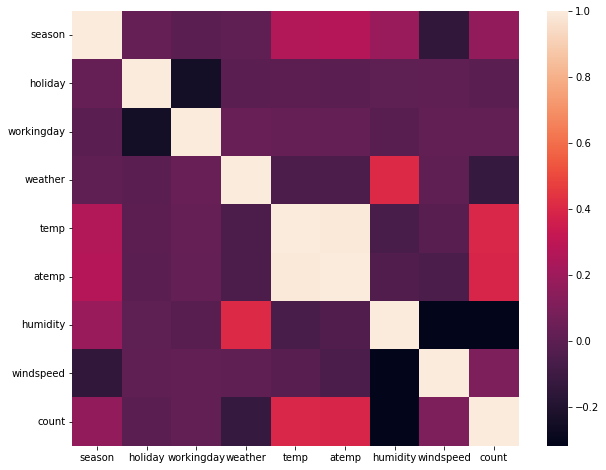

In [27]:
## Let's visualize correlations using heatmap
plt.figure(figsize=(10,8))
sns.heatmap(train.corr())
plt.show()

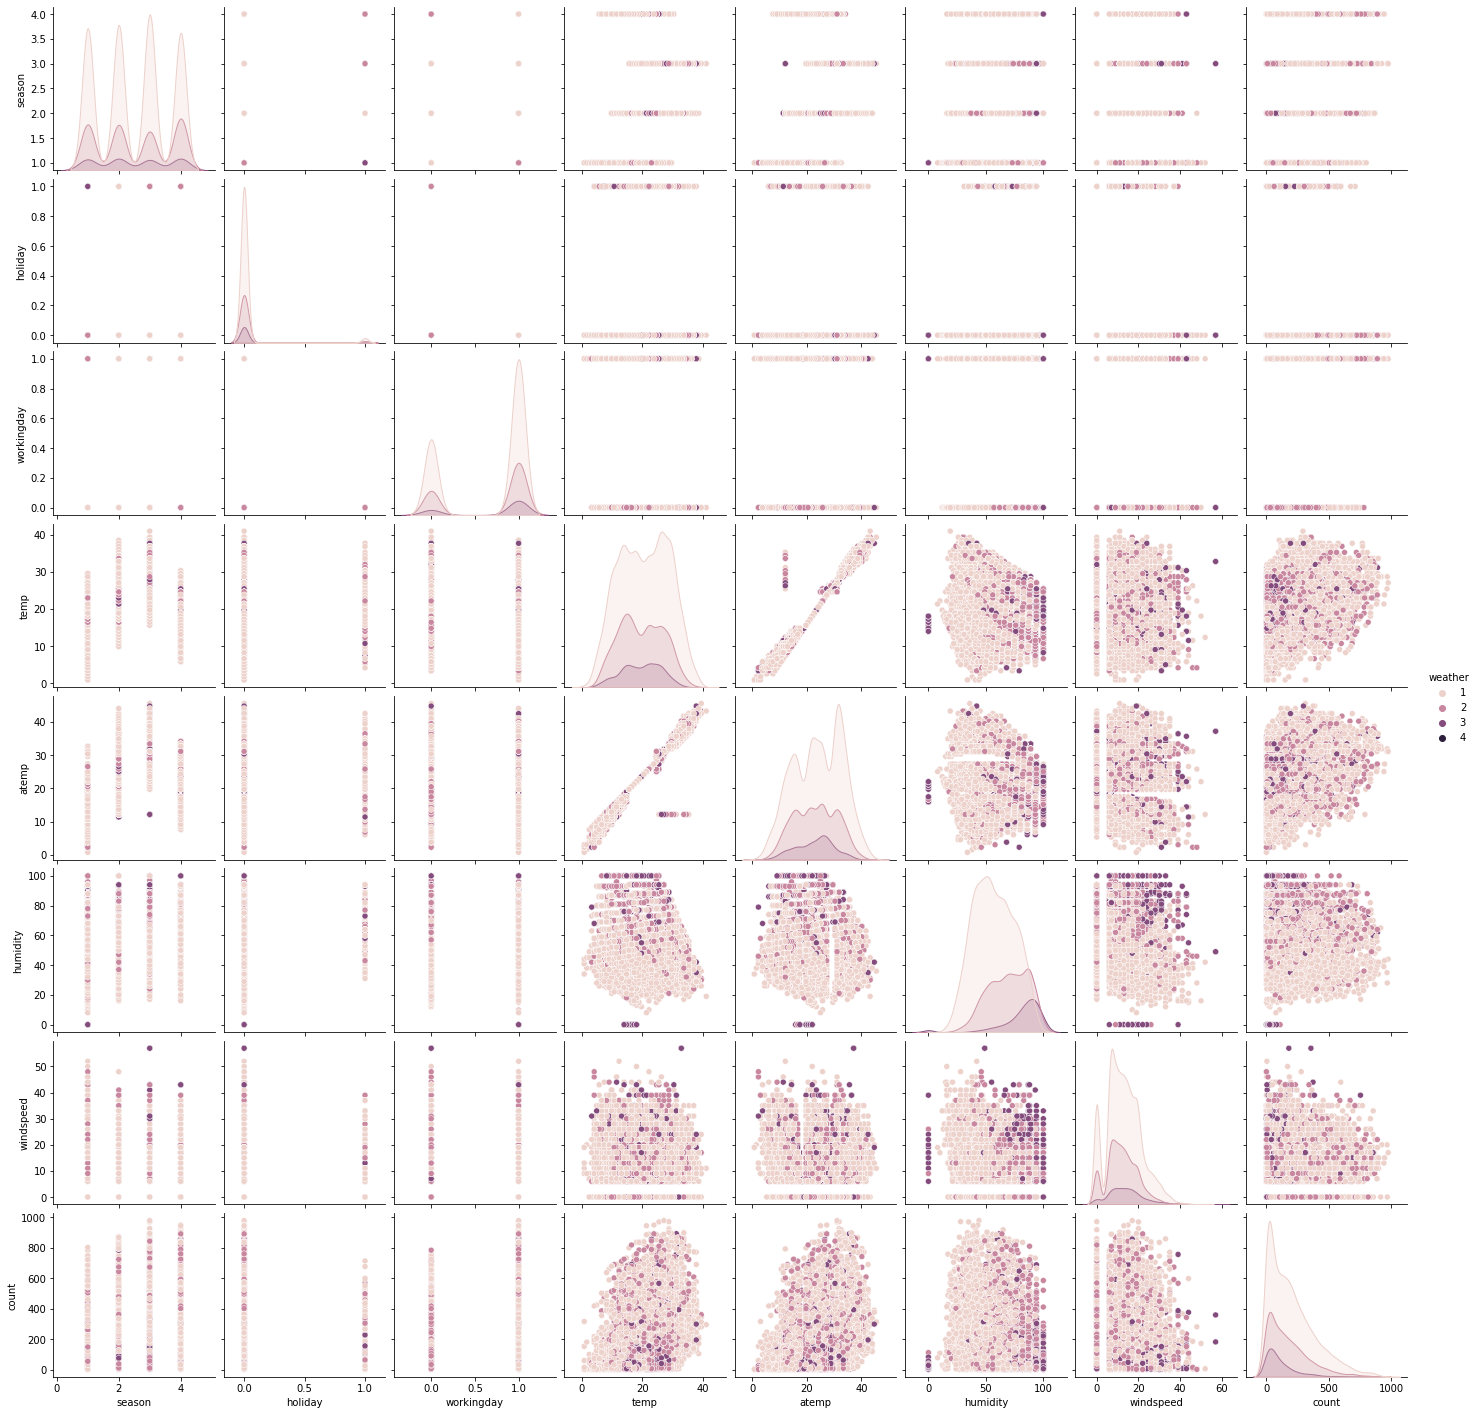

In [28]:
## Let's view pairwise scatterplots with weather facet 
sns.pairplot(train, hue="weather")
plt.show()

### Timeseries analysis

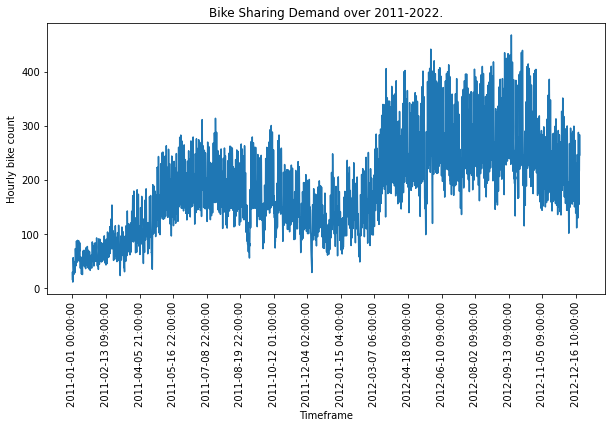

In [29]:
plt.figure(figsize=(10,5))

plt.plot(train['datetime'],train['count'].ewm(span = 24).mean())
plt.title('Bike Sharing Demand over 2011-2022.')
plt.xlabel('Timeframe')
plt.ylabel('Hourly bike count')

start_number=0
end_number = len(train['datetime'])
step_number = 24*30

plt.xticks(range(start_number,end_number,step_number),rotation=90)
plt.show()

In [30]:
## Observation: there is a general growth trend (2011 vs 2012)
## Let's look at week timeframe

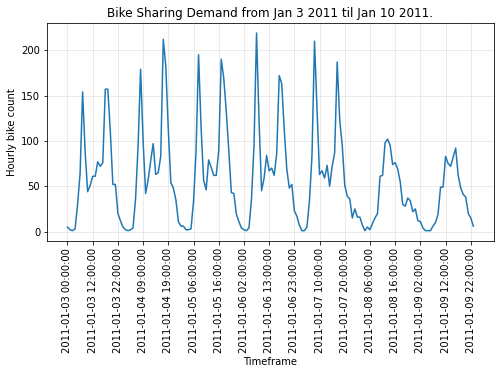

In [31]:
filt = (train['datetime']>='2011-01-03') & (train['datetime']<='2011-01-10')

plt.figure(figsize=(8,4))

plt.plot(train[filt]['datetime'],train[filt]['count'])

plt.title('Bike Sharing Demand from Jan 3 2011 til Jan 10 2011.')
plt.xlabel('Timeframe')
plt.ylabel('Hourly bike count')

start_number=0
end_number = len(train[filt]['datetime'])
step_number = 10

plt.grid(alpha=0.3)
plt.xticks(range(start_number,end_number,step_number),rotation=90)
plt.show()

In [32]:
## observations: high hourly seasonality, low demand at weekends

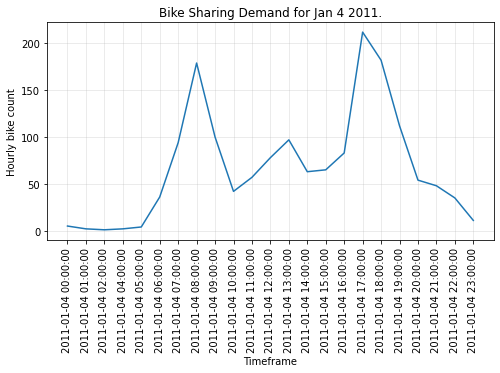

In [33]:
## Let's look at day timeframe

plt.figure(figsize=(8,4))

filt = (train['datetime']>='2011-01-04') & (train['datetime']<'2011-01-05')

plt.plot(train[filt]['datetime'],train[filt]['count'])

plt.title('Bike Sharing Demand for Jan 4 2011.')
plt.xlabel('Timeframe')
plt.ylabel('Hourly bike count')
plt.grid(alpha=0.3)

plt.xticks(rotation=90)
plt.show()

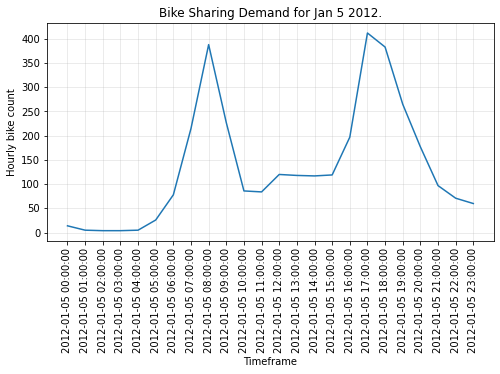

In [34]:
## Let's look at day timeframe

plt.figure(figsize=(8,4))

filt = (train['datetime']>='2012-01-05') & (train['datetime']<'2012-01-06')

plt.plot(train[filt]['datetime'],train[filt]['count'])
plt.title('Bike Sharing Demand for Jan 5 2012.')
plt.xlabel('Timeframe')
plt.ylabel('Hourly bike count')
plt.grid(alpha=0.3)

plt.xticks(rotation=90)
plt.show()

In [35]:
## Observation: there ara 3 spikes in demand observed across morning (7am - 9am), lunch (11am - 1pm), and evening (4 - 7pm). On the other hand, demand tends to fall to its lowest levels starting from 11PM till 6AM. 

### Feature Engineering

In [37]:
# create a new feature

train['datetime'] = pd.to_datetime(train['datetime'])
train['datetime_hour'] = train['datetime'].dt.hour
train['datetime_day'] = train['datetime'].dt.day
train['datetime_week'] = train['datetime'].dt.week
train['datetime_month'] = train['datetime'].dt.month
train['datetime_year'] = train['datetime'].dt.year
train['datetime_dayofweek'] = train['datetime'].dt.dayofweek

test['datetime'] = pd.to_datetime(test['datetime'])
test['datetime_hour'] = test['datetime'].dt.hour
test['datetime_day'] = test['datetime'].dt.day
test['datetime_week'] = test['datetime'].dt.week
test['datetime_month'] = test['datetime'].dt.month
test['datetime_year'] = test['datetime'].dt.year
test['datetime_dayofweek'] = test['datetime'].dt.dayofweek

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [38]:
## adding extra hour categories: morning, lunch, evening, none

def extract_hour_category(h):
    if h in [7,8,9]:
        return 1
    elif h in [11,12,13]:
        return 2
    elif h in [17,18,19]:
        return 3
    elif h in [23,0,1,2,3,4,5]:
        return 4
    else:
        return 0

    
train['hour_category'] = train['datetime_hour'].apply(lambda x: extract_hour_category(x))
test['hour_category'] = test['datetime_hour'].apply(lambda x: extract_hour_category(x))

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [39]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")
train['hour_category'] = train["hour_category"].astype("category")
test['hour_category'] = test["hour_category"].astype("category")

In [40]:
# View are new feature
train.head()

datetime season  holiday  workingday weather  temp   atemp  \
0 2011-01-01 00:00:00      1        0           0       1  9.84  14.395   
1 2011-01-01 01:00:00      1        0           0       1  9.02  13.635   
2 2011-01-01 02:00:00      1        0           0       1  9.02  13.635   
3 2011-01-01 03:00:00      1        0           0       1  9.84  14.395   
4 2011-01-01 04:00:00      1        0           0       1  9.84  14.395   

   humidity  windspeed  count  datetime_hour  datetime_day  datetime_month  \
0        81        0.0     16              0             1               1   
1        80        0.0     40              1             1               1   
2        80        0.0     32              2             1               1   
3        75        0.0     13              3             1               1   
4        75        0.0      1              4             1               1   

   datetime_year  datetime_dayofweek  datetime_week hour_category  
0           2011                   5             52             4  
1           2011                   5             52             4  
2           2011                   5             52             4  
3           2011                   5             52             4  
4           2011                   5             52             4

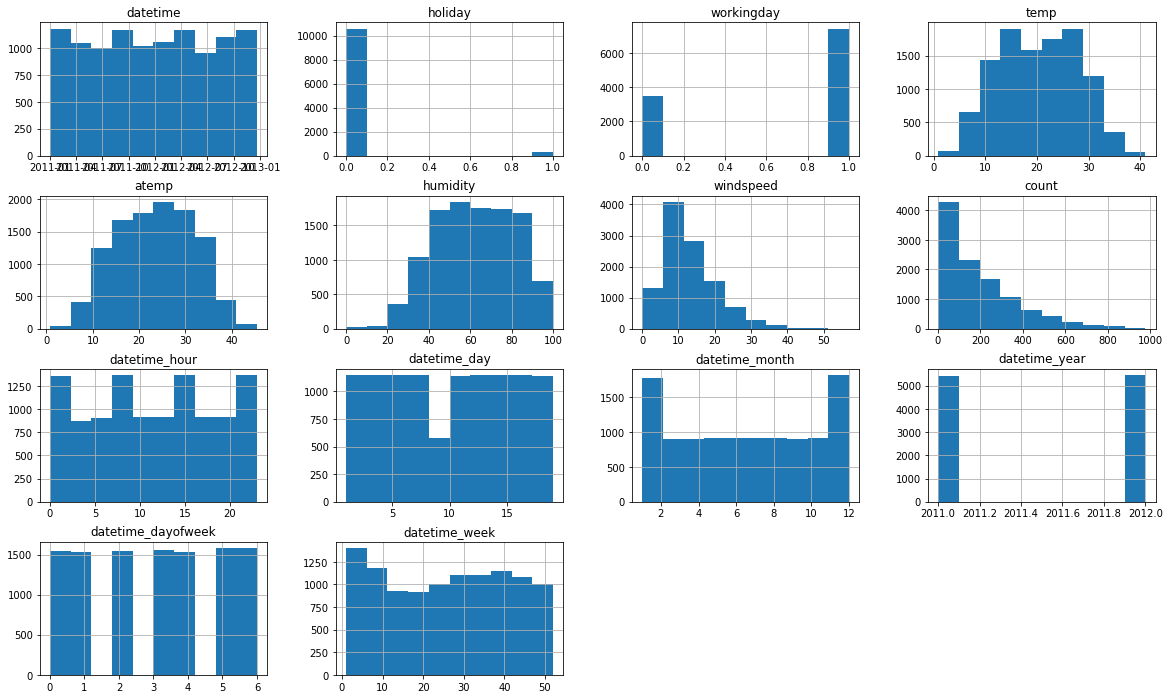

In [41]:
# View histogram of all features again now with the hour feature
import matplotlib.pyplot as plt
train.hist(figsize = (20,12))
plt.show()

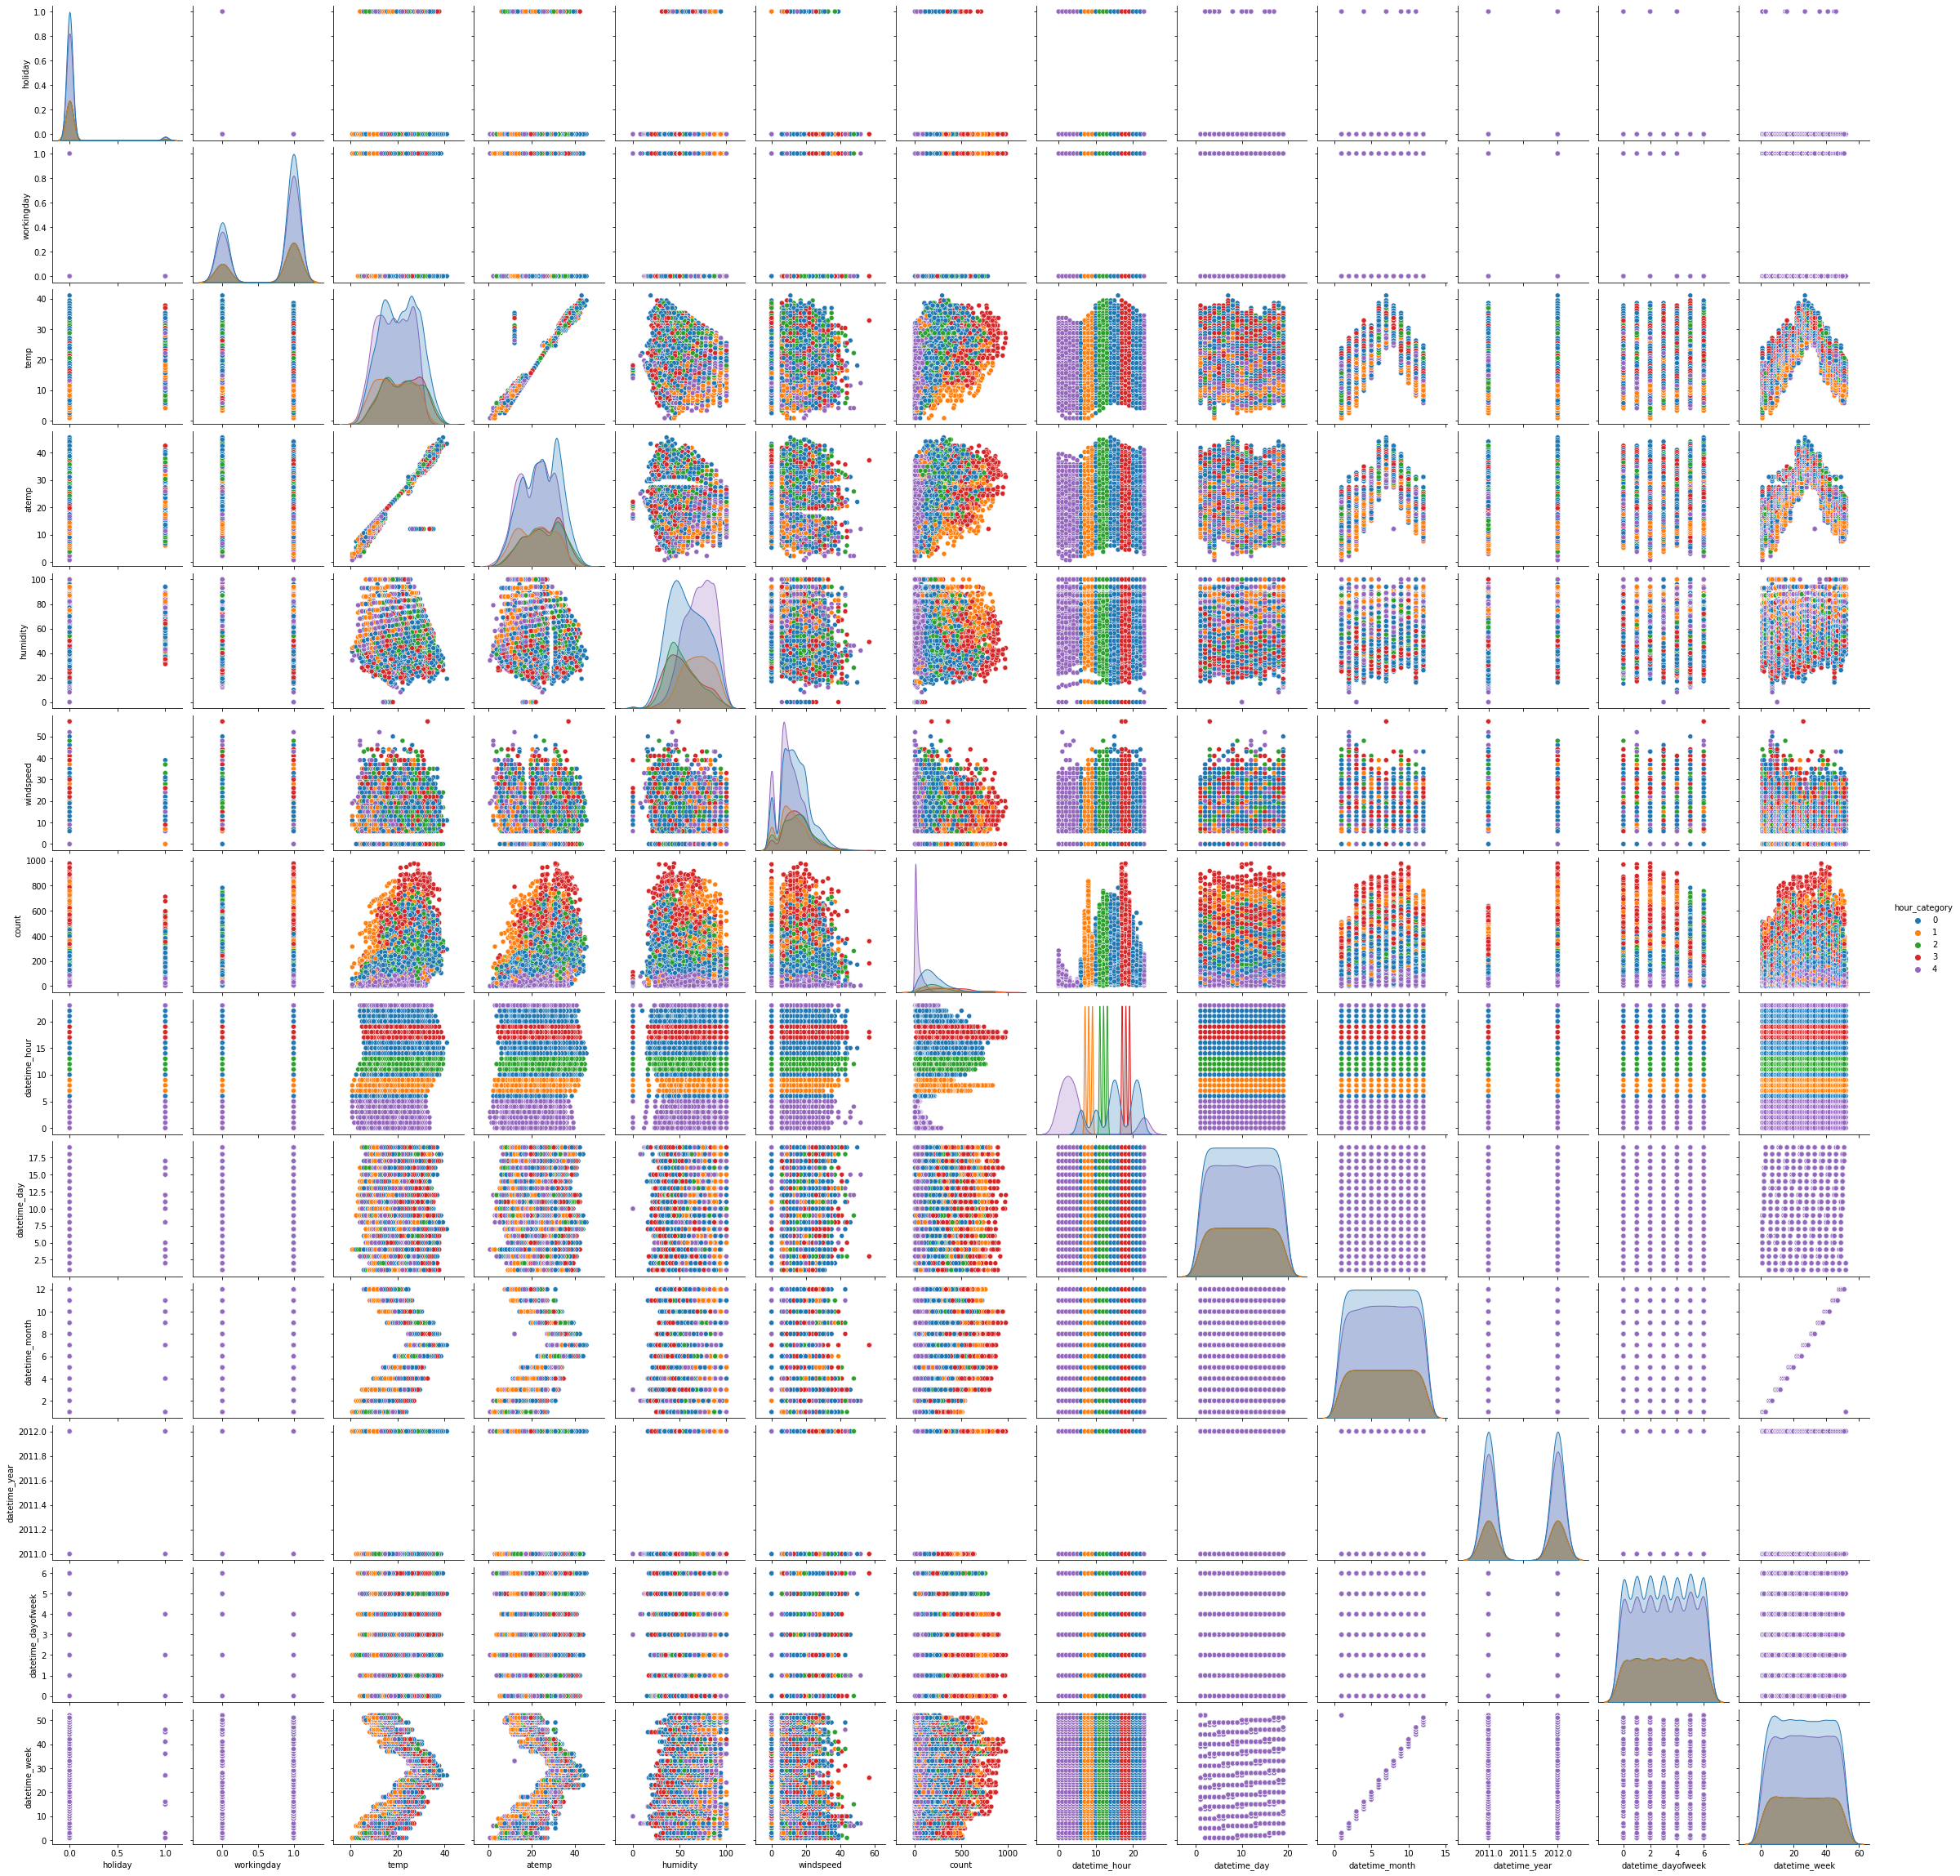

In [42]:
sns.pairplot(train, hue="hour_category")

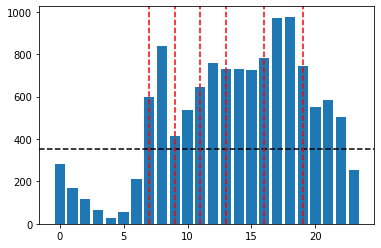

In [43]:
filt = (train['datetime_year']==2012) #& (train['datetime_month']==4)

plt.bar(train[filt]['datetime_hour'],train[filt]['count'])
plt.axhline(train[filt]['count'].quantile(0.75),c='black',linestyle='--')

plt.axvline(7, c='r', linestyle='--')
plt.axvline(9, c='r', linestyle='--')

plt.axvline(11, c='r', linestyle='--')
plt.axvline(13, c='r', linestyle='--')

plt.axvline(16, c='r', linestyle='--')
plt.axvline(19, c='r', linestyle='--')

In [44]:
train['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

## Step 5: Rerun the model with the same settings as before, just with more features

### Experiment 2a: new features

In [165]:
predictor_new_features_2a = TabularPredictor(
    label = 'count',
    eval_metric = 'root_mean_squared_error',
).fit(
    train_data = train,
    time_limit = 600, 
    presets='best_quality'
)

No path specified. Models will be saved in: "AutogluonModels/ag-20221226_142547/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20221226_142547/"
AutoGluon Version:  0.6.1
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 26 20:36:53 UTC 2022
Train Data Rows:    10886
Train Data Columns: 16
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fe

In [171]:
predictor_new_features_2a.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.106888      24.001545  521.170630                0.001105           0.292291            3       True         12
1          CatBoost_BAG_L2  -30.377937      22.302106  427.497371                0.125932          79.537608            2       True         11
2          LightGBM_BAG_L2  -30.488781      22.488722  375.780792                0.312548          27.821029            2       True          9
3        LightGBMXT_BAG_L2  -31.127338      22.881001  383.662378                0.704827          35.702615            2       True          8
4   RandomForestMSE_BAG_L2  -31.354564      22.857134  377.817086                0.680960          29.857323            2       True         10
5      WeightedEnsemble_L2  -31.653175      22.069522  348.557548         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -32.972357766618615,
  'LightGBM_BAG_L1': -33.54062969122618,
  'RandomForestMSE_BAG_L1': -38.28313968009453,
  'CatBoost_BAG_L1': -34.2232398416045,
  'WeightedEnsemble_L2': -31.653175350057957,
  'LightGBMXT_BAG_L2'

In [181]:
predictor_new_features_2a.leaderboard(silent=True)

model   score_val  pred_time_val    fit_time  \
0      WeightedEnsemble_L3  -30.106888      24.001545  521.170630   
1          CatBoost_BAG_L2  -30.377937      22.302106  427.497371   
2          LightGBM_BAG_L2  -30.488781      22.488722  375.780792   
3        LightGBMXT_BAG_L2  -31.127338      22.881001  383.662378   
4   RandomForestMSE_BAG_L2  -31.354564      22.857134  377.817086   
5      WeightedEnsemble_L2  -31.653175      22.069522  348.557548   
6        LightGBMXT_BAG_L1  -32.972358      17.436497  105.503806   
7          LightGBM_BAG_L1  -33.540630       3.461847   52.791747   
8          CatBoost_BAG_L1  -34.223240       0.159176  171.680278   
9   RandomForestMSE_BAG_L1  -38.283140       0.903128   17.857386   
10   KNeighborsDist_BAG_L1  -84.125061       0.107616    0.058535   
11   KNeighborsUnif_BAG_L1 -101.546199       0.107910    0.068011   

    pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                 0.001105           0.292291            3       True   
1                 0.125932          79.537608            2       True   
2                 0.312548          27.821029            2       True   
3                 0.704827          35.702615            2       True   
4                 0.680960          29.857323            2       True   
5                 0.001258           0.665796            2       True   
6                17.436497         105.503806            1       True   
7                 3.461847          52.791747            1       True   
8                 0.159176         171.680278            1       True   
9                 0.903128          17.857386            1       True   
10                0.107616           0.058535            1       True   
11                0.107910           0.068011            1       True   

    fit_order  
0          12  
1          11  
2           9  
3           8  
4          10  
5           7  
6           3  
7           4  
8           6  
9           5  
10          2  
11          1

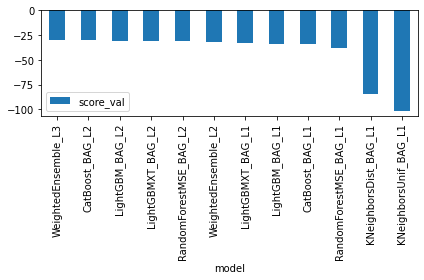

In [184]:
fig = predictor_new_features_2a.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val").figure
fig.tight_layout()
fig.savefig('img/exp_2a_leaderboard.png')

In [173]:
# Remember to set all negative values to zero
predictions_new_features_2a = predictor_new_features_2a.predict(test)
predictions_new_features_2a.describe()

count    6493.000000
mean      157.081726
std       136.723343
min         2.417695
25%        51.513840
50%       120.013924
75%       223.343887
max       810.798950
Name: count, dtype: float64

In [174]:
(predictions_new_features_2a<0).sum()

0

In [175]:
predictions_new_features_2a = predictions_new_features_2a.apply(lambda x: 0 if x<0 else x)

In [176]:
submission_new_features_2a = pd.read_csv("sampleSubmission.csv")

In [177]:
# Same submitting predictions
submission_new_features_2a["count"] = predictions_new_features_2a
submission_new_features_2a.to_csv("submission_new_features_2a.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features_2a.csv -m "new features 2a"

In [178]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 10

fileName                        date                 description                                                                                                                                                                                                                                           status    publicScore  privateScore  
------------------------------  -------------------  ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  --------  -----------  ------------  
submission_new_hpo_3e.csv       2022-12-26 13:59:46  hp tuning 3e                                                                                                                                                                                                                                          complete  0.49307      0.49

### Experiment 2b. Same config, dropping month, day, dayofweek, year

* Looking at Autogluon training logs above, noticed that Autogluon processing step also decomposes datetime feature into several new features:

`('int', ['datetime_as_int']) : 5 | ['datetime', 'datetime.year', 'datetime.month', 'datetime.day', 'datetime.dayofweek']`

* Will run one extra experiment ignoring newly created columns `['datetime_month','datetime_day','datetime_dayofweek', 'datetime_year']` to check if removing duplication improves final performance.

In [ ]:
predictor_new_features_2b = TabularPredictor(
    label = 'count',
    eval_metric = 'root_mean_squared_error',
).fit(
    train_data = train.drop(columns = ['datetime_month','datetime_day','datetime_dayofweek','datetime_week', 'datetime_year']),
    time_limit = 600, 
    presets='best_quality',
)

No path specified. Models will be saved in: "AutogluonModels/ag-20221226_124540/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20221226_124540/"
AutoGluon Version:  0.6.1
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 26 20:36:53 UTC 2022
Train Data Rows:    10886
Train Data Columns: 11
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fe

In [ ]:
predictor_new_features_2b.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.150922      25.725962  556.149490                0.000877           0.293293            3       True         14
1          CatBoost_BAG_L2  -30.388608      23.719227  468.144321                0.119392          71.445114            2       True         13
2          LightGBM_BAG_L2  -30.548320      23.927661  422.797380                0.327826          26.098173            2       True         11
3        LightGBMXT_BAG_L2  -31.003969      24.606218  427.920316                1.006384          31.221109            2       True         10
4   RandomForestMSE_BAG_L2  -31.362428      24.271482  427.091802                0.671648          30.392595            2       True         12
5      WeightedEnsemble_L2  -31.736281      22.411067  349.937558         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -33.06977986045687,
  'LightGBM_BAG_L1': -33.541281049845416,
  'RandomForestMSE_BAG_L1': -38.30

In [ ]:
predictor_new_features_2b.leaderboard(silent=True)

model   score_val  pred_time_val    fit_time  \
0      WeightedEnsemble_L3  -30.150922      25.725962  556.149490   
1          CatBoost_BAG_L2  -30.388608      23.719227  468.144321   
2          LightGBM_BAG_L2  -30.548320      23.927661  422.797380   
3        LightGBMXT_BAG_L2  -31.003969      24.606218  427.920316   
4   RandomForestMSE_BAG_L2  -31.362428      24.271482  427.091802   
5      WeightedEnsemble_L2  -31.736281      22.411067  349.937558   
6        LightGBMXT_BAG_L1  -33.069780      17.895373   89.332585   
7          LightGBM_BAG_L1  -33.541281       3.571695   47.522052   
8          CatBoost_BAG_L1  -33.938428       0.207587  199.872878   
9     ExtraTreesMSE_BAG_L1  -37.841138       0.608934    5.977964   
10  RandomForestMSE_BAG_L1  -38.304598       0.631685   12.677532   
11  NeuralNetFastAI_BAG_L1  -72.788383       0.474992   41.243789   
12   KNeighborsDist_BAG_L1  -84.125061       0.103832    0.029102   
13   KNeighborsUnif_BAG_L1 -101.546199       0.105737    0.043305   

    pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                 0.000877           0.293293            3       True   
1                 0.119392          71.445114            2       True   
2                 0.327826          26.098173            2       True   
3                 1.006384          31.221109            2       True   
4                 0.671648          30.392595            2       True   
5                 0.000895           0.503409            2       True   
6                17.895373          89.332585            1       True   
7                 3.571695          47.522052            1       True   
8                 0.207587         199.872878            1       True   
9                 0.608934           5.977964            1       True   
10                0.631685          12.677532            1       True   
11                0.474992          41.243789            1       True   
12                0.103832           0.029102            1       True   
13                0.105737           0.043305            1       True   

    fit_order  
0          14  
1          13  
2          11  
3          10  
4          12  
5           9  
6           3  
7           4  
8           6  
9           7  
10          5  
11          8  
12          2  
13          1

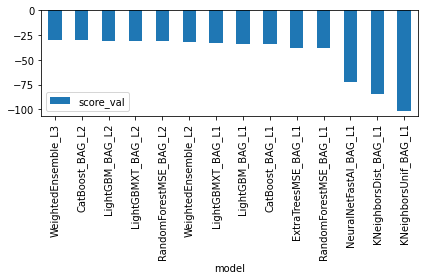

In [185]:
fig = predictor_new_features_2b.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val").figure
fig.tight_layout()
fig.savefig('img/exp_2b_leaderboard.png')

In [ ]:
# Remember to set all negative values to zero
predictions_new_features_2b = predictor_new_features_2b.predict(test)
predictions_new_features_2b.describe()

count    6493.000000
mean      156.803406
std       135.177689
min         2.408113
25%        51.911545
50%       122.218353
75%       226.373245
max       794.151550
Name: count, dtype: float64

In [ ]:
(predictions_new_features_2b<0).sum()

0

In [ ]:
predictions_new_features_2b = predictions_new_features_2b.apply(lambda x: 0 if x<0 else x)

In [ ]:
submission_new_features_2b = pd.read_csv("sampleSubmission.csv")

In [68]:
# Same submitting predictions
submission_new_features_2b["count"] = predictions_new_features_2b
submission_new_features_2b.to_csv("submission_new_features_2b.csv", index=False)

In [69]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features_2b.csv -m "new features 2b"

100%|█████████████████████████████████████████| 243k/243k [00:00<00:00, 434kB/s]
Successfully submitted to Bike Sharing Demand

In [70]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 10

fileName                        date                 description                                                                                                                                                                                                                                           status    publicScore  privateScore  
------------------------------  -------------------  ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  --------  -----------  ------------  
submission_new_features_2b.csv  2022-12-26 13:13:10  new features 2b                                                                                                                                                                                                                                       complete  0.65357      0.65

#### New Score of 0.66423

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [54]:
# Default ensembling/stacking hpo configuration: num_stack_levels=1, num_bag_folds=8, num_bag_sets=20

### Experiment 3a. Increasing num_stack_levels from 1 to 2.

In [71]:
predictor_new_hpo_3a = TabularPredictor(
    label = 'count',
    eval_metric = 'root_mean_squared_error',
).fit(
    train_data = train,
    time_limit = 600, 
    presets='best_quality',
    num_stack_levels = 2, 
)

No path specified. Models will be saved in: "AutogluonModels/ag-20221226_131328/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=2, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20221226_131328/"
AutoGluon Version:  0.6.1
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 26 20:36:53 UTC 2022
Train Data Rows:    10886
Train Data Columns: 16
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fe

In [72]:
predictor_new_hpo_3a.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.073807      20.757755  421.973336                0.000817           0.342283            3       True         13
1          LightGBM_BAG_L2  -30.373742      19.214392  271.819600                0.356215          27.334411            2       True          9
2          CatBoost_BAG_L2  -30.459913      18.991939  354.226140                0.133763         109.740951            2       True         11
3      WeightedEnsemble_L4  -30.597974      22.379541  530.709490                0.000849           0.294913            4       True         18
4          CatBoost_BAG_L3  -30.696424      21.527538  476.885877                0.105708          25.225553            3       True         17
5        LightGBMXT_BAG_L2  -30.993537      19.610932  274.453940         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L3': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L3': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L3': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L4': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L

In [73]:
predictor_new_hpo_3a.leaderboard(silent=True)

model   score_val  pred_time_val    fit_time  \
0      WeightedEnsemble_L3  -30.073807      20.757755  421.973336   
1          LightGBM_BAG_L2  -30.373742      19.214392  271.819600   
2          CatBoost_BAG_L2  -30.459913      18.991939  354.226140   
3      WeightedEnsemble_L4  -30.597974      22.379541  530.709490   
4          CatBoost_BAG_L3  -30.696424      21.527538  476.885877   
5        LightGBMXT_BAG_L2  -30.993537      19.610932  274.453940   
6          LightGBM_BAG_L3  -31.030774      21.562387  475.549113   
7     ExtraTreesMSE_BAG_L2  -31.203035      19.514205  254.586939   
8   RandomForestMSE_BAG_L2  -31.516652      19.523067  274.514460   
9   RandomForestMSE_BAG_L3  -31.577350      22.132426  481.300236   
10       LightGBMXT_BAG_L3  -31.670032      21.628945  476.239813   
11     WeightedEnsemble_L2  -31.716206      18.751797  244.867637   
12       LightGBMXT_BAG_L1  -32.972358      14.677035   97.267682   
13         LightGBM_BAG_L1  -33.540630       3.233115   49.496090   
14         CatBoost_BAG_L1  -35.906492       0.108761   80.936460   
15  RandomForestMSE_BAG_L1  -38.283140       0.627138   16.697175   
16   KNeighborsDist_BAG_L1  -84.125061       0.104802    0.041766   
17   KNeighborsUnif_BAG_L1 -101.546199       0.107326    0.046016   

    pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                 0.000817           0.342283            3       True   
1                 0.356215          27.334411            2       True   
2                 0.133763         109.740951            2       True   
3                 0.000849           0.294913            4       True   
4                 0.105708          25.225553            3       True   
5                 0.752755          29.968751            2       True   
6                 0.140558          23.888788            3       True   
7                 0.656029          10.101751            2       True   
8                 0.664891          30.029272            2       True   
9                 0.710597          29.639912            3       True   
10                0.207116          24.579489            3       True   
11                0.000946           0.428463            2       True   
12               14.677035          97.267682            1       True   
13                3.233115          49.496090            1       True   
14                0.108761          80.936460            1       True   
15                0.627138          16.697175            1       True   
16                0.104802           0.041766            1       True   
17                0.107326           0.046016            1       True   

    fit_order  
0          13  
1           9  
2          11  
3          18  
4          17  
5           8  
6          15  
7          12  
8          10  
9          16  
10         14  
11          7  
12          3  
13          4  
14          6  
15          5  
16          2  
17          1

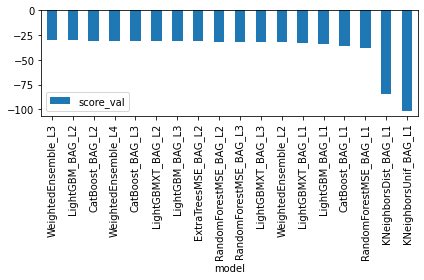

In [186]:
fig = predictor_new_hpo_3a.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val").figure
fig.tight_layout()
fig.savefig('img/exp_3a_leaderboard.png')

In [75]:
# Remember to set all negative values to zero
predictions_new_hpo_3a = predictor_new_hpo_3a.predict(test)
predictions_new_hpo_3a.describe()

count    6493.000000
mean      156.263962
std       136.127396
min         2.221345
25%        51.584747
50%       119.469810
75%       222.454544
max       803.260193
Name: count, dtype: float64

In [76]:
(predictions_new_hpo_3a<0).sum()

0

In [77]:
predictions_new_hpo_3a = predictions_new_hpo_3a.apply(lambda x: 0 if x<0 else x)
predictions_new_hpo_3a.describe()

count    6493.000000
mean      156.263971
std       136.127393
min         2.221345
25%        51.584747
50%       119.469810
75%       222.454544
max       803.260193
Name: count, dtype: float64

In [78]:
submission_new_hpo_3a = pd.read_csv("sampleSubmission.csv")

In [79]:
# Same submitting predictions
submission_new_hpo_3a["count"] = predictions_new_hpo_3a
submission_new_hpo_3a.to_csv("submission_new_hpo_3a.csv", index=False)

In [80]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo_3a.csv -m "hpo 3a num_stack_levels = 2"

100%|█████████████████████████████████████████| 243k/243k [00:00<00:00, 470kB/s]
Successfully submitted to Bike Sharing Demand

In [81]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                        date                 description                                                                                                                                                                                                                                           status    publicScore  privateScore  
------------------------------  -------------------  ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  --------  -----------  ------------  
submission_new_hpo_3a.csv       2022-12-26 13:24:35  hpo 3a num_stack_levels = 2                                                                                                                                                                                                                           complete  0.66835      0.66

#### New Score of 0.67217

### Experiment 3b. Increasing num_bag_folds from 8 to 10.

In [82]:
predictor_new_hpo_3b = TabularPredictor(
    label = 'count',
    eval_metric = 'root_mean_squared_error',
).fit(
    train_data = train,
    presets='best_quality',
    num_bag_folds = 10,
    time_limit = 600, 
)

No path specified. Models will be saved in: "AutogluonModels/ag-20221226_132437/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=10, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20221226_132437/"
AutoGluon Version:  0.6.1
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 26 20:36:53 UTC 2022
Train Data Rows:    10886
Train Data Columns: 16
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using F

In [83]:
predictor_new_hpo_3b.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -29.853200      18.382146  524.679103                0.001139           0.298670            3       True         13
1          LightGBM_BAG_L2  -30.094854      17.364107  404.967932                0.367318          35.518546            2       True         10
2          CatBoost_BAG_L2  -30.332858      17.167829  448.077864                0.171040          78.628478            2       True         12
3        LightGBMXT_BAG_L2  -30.737652      17.842649  410.233409                0.845860          40.784023            2       True          9
4      WeightedEnsemble_L2  -31.382073      16.264564  362.617095                0.001435           0.794605            2       True          8
5   RandomForestMSE_BAG_L2  -31.529282      17.674947  401.600474         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -32.599055251891826,
  'LightGBM_BAG_L1': -32.9397869637605,
  'RandomForestMSE_BAG_L1': -38.28313968009453,
  'CatBoost_BAG_L1': -34.30909469417376,
  'ExtraTreesM

In [84]:
predictor_new_hpo_3b.leaderboard(silent=True)

model   score_val  pred_time_val    fit_time  \
0      WeightedEnsemble_L3  -29.853200      18.382146  524.679103   
1          LightGBM_BAG_L2  -30.094854      17.364107  404.967932   
2          CatBoost_BAG_L2  -30.332858      17.167829  448.077864   
3        LightGBMXT_BAG_L2  -30.737652      17.842649  410.233409   
4      WeightedEnsemble_L2  -31.382073      16.264564  362.617095   
5   RandomForestMSE_BAG_L2  -31.529282      17.674947  401.600474   
6        LightGBMXT_BAG_L1  -32.599055      12.561143  108.223031   
7          LightGBM_BAG_L1  -32.939787       2.748748   57.674279   
8          CatBoost_BAG_L1  -34.309095       0.211043  179.481567   
9     ExtraTreesMSE_BAG_L1  -37.423673       0.630543    7.581843   
10  RandomForestMSE_BAG_L1  -38.283140       0.638364   16.402948   
11   KNeighborsDist_BAG_L1  -84.125061       0.103830    0.040665   
12   KNeighborsUnif_BAG_L1 -101.546199       0.103118    0.045053   

    pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                 0.001139           0.298670            3       True   
1                 0.367318          35.518546            2       True   
2                 0.171040          78.628478            2       True   
3                 0.845860          40.784023            2       True   
4                 0.001435           0.794605            2       True   
5                 0.678158          32.151088            2       True   
6                12.561143         108.223031            1       True   
7                 2.748748          57.674279            1       True   
8                 0.211043         179.481567            1       True   
9                 0.630543           7.581843            1       True   
10                0.638364          16.402948            1       True   
11                0.103830           0.040665            1       True   
12                0.103118           0.045053            1       True   

    fit_order  
0          13  
1          10  
2          12  
3           9  
4           8  
5          11  
6           3  
7           4  
8           6  
9           7  
10          5  
11          2  
12          1

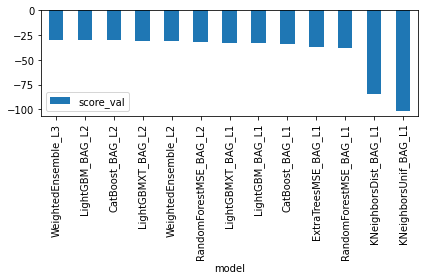

In [187]:
fig = predictor_new_hpo_3b.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val").figure
fig.tight_layout()
fig.savefig('img/exp_3b_leaderboard.png')

In [86]:
# Remember to set all negative values to zero
predictions_new_hpo_3b = predictor_new_hpo_3b.predict(test)
predictions_new_hpo_3b.describe()

count    6493.000000
mean      160.360275
std       139.554337
min         2.212470
25%        52.166279
50%       124.043221
75%       229.185211
max       804.144897
Name: count, dtype: float64

In [87]:
(predictions_new_hpo_3b<0).sum()

0

In [88]:
predictions_new_hpo_3b = predictions_new_hpo_3b.apply(lambda x: 0 if x<0 else x)
predictions_new_hpo_3b.describe()

count    6493.000000
mean      160.360273
std       139.554337
min         2.212470
25%        52.166279
50%       124.043221
75%       229.185211
max       804.144897
Name: count, dtype: float64

In [89]:
submission_new_hpo_3b = pd.read_csv("sampleSubmission.csv")
# Same submitting predictions
submission_new_hpo_3b["count"] = predictions_new_hpo_3b
submission_new_hpo_3b.to_csv("submission_new_hpo_3b.csv", index=False)

In [90]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo_3b.csv -m "hpo 3b num_bag_folds = 10"

100%|█████████████████████████████████████████| 243k/243k [00:00<00:00, 477kB/s]
Successfully submitted to Bike Sharing Demand

In [91]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                        date                 description                                                                                                                                                                                                                                           status    publicScore  privateScore  
------------------------------  -------------------  ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  --------  -----------  ------------  
submission_new_hpo_3b.csv       2022-12-26 13:35:38  hpo 3b num_bag_folds = 10                                                                                                                                                                                                                             complete  0.63100      0.63

#### New Score of 0.79137

### Experiment 3c. Decreasing num_bag_sets= from 20 to 5.

In [92]:
predictor_new_hpo_3c = TabularPredictor(
    label = 'count',
    eval_metric = 'root_mean_squared_error',
).fit(
    train_data = train,
    presets='best_quality',
    num_bag_sets = 5,
    time_limit = 600, 
)

No path specified. Models will be saved in: "AutogluonModels/ag-20221226_133540/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=5
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20221226_133540/"
AutoGluon Version:  0.6.1
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 26 20:36:53 UTC 2022
Train Data Rows:    10886
Train Data Columns: 16
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fea

In [93]:
predictor_new_hpo_3c.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.169168      21.202884  557.956483                0.000837           0.289357            3       True         14
1          LightGBM_BAG_L2  -30.432906      19.787925  427.108798                0.289943          27.991384            2       True         11
2          CatBoost_BAG_L2  -30.627700      19.627053  464.884130                0.129071          65.766716            2       True         13
3        LightGBMXT_BAG_L2  -31.078828      20.097915  428.952320                0.599934          29.834905            2       True         10
4   RandomForestMSE_BAG_L2  -31.306516      20.183100  434.074120                0.685118          34.956706            2       True         12
5      WeightedEnsemble_L2  -31.628556      17.923118  353.212819         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -32.972357766618615,
  'LightGBM_BAG_L1': -33.54062969122618,
  'RandomForestMSE_BAG_L1': -38.28

In [94]:
predictor_new_hpo_3c.leaderboard(silent=True)

model   score_val  pred_time_val    fit_time  \
0      WeightedEnsemble_L3  -30.169168      21.202884  557.956483   
1          LightGBM_BAG_L2  -30.432906      19.787925  427.108798   
2          CatBoost_BAG_L2  -30.627700      19.627053  464.884130   
3        LightGBMXT_BAG_L2  -31.078828      20.097915  428.952320   
4   RandomForestMSE_BAG_L2  -31.306516      20.183100  434.074120   
5      WeightedEnsemble_L2  -31.628556      17.923118  353.212819   
6        LightGBMXT_BAG_L1  -32.972358      13.731958   97.282146   
7          LightGBM_BAG_L1  -33.540630       3.239727   48.931604   
8          CatBoost_BAG_L1  -33.900201       0.194296  189.893482   
9     ExtraTreesMSE_BAG_L1  -37.423673       0.616393    7.486015   
10  RandomForestMSE_BAG_L1  -38.283140       0.651644   16.297994   
11  NeuralNetFastAI_BAG_L1  -82.125954       0.853284   39.143703   
12   KNeighborsDist_BAG_L1  -84.125061       0.104123    0.040852   
13   KNeighborsUnif_BAG_L1 -101.546199       0.106556    0.041618   

    pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                 0.000837           0.289357            3       True   
1                 0.289943          27.991384            2       True   
2                 0.129071          65.766716            2       True   
3                 0.599934          29.834905            2       True   
4                 0.685118          34.956706            2       True   
5                 0.001369           0.766741            2       True   
6                13.731958          97.282146            1       True   
7                 3.239727          48.931604            1       True   
8                 0.194296         189.893482            1       True   
9                 0.616393           7.486015            1       True   
10                0.651644          16.297994            1       True   
11                0.853284          39.143703            1       True   
12                0.104123           0.040852            1       True   
13                0.106556           0.041618            1       True   

    fit_order  
0          14  
1          11  
2          13  
3          10  
4          12  
5           9  
6           3  
7           4  
8           6  
9           7  
10          5  
11          8  
12          2  
13          1

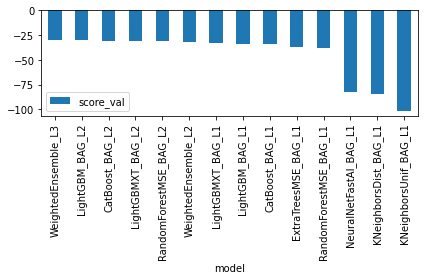

In [188]:
fig = predictor_new_hpo_3c.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val").figure
fig.tight_layout()
fig.savefig('img/exp_3c_leaderboard.png')

In [96]:
# Remember to set all negative values to zero
predictions_new_hpo_3c = predictor_new_hpo_3c.predict(test)
predictions_new_hpo_3c.describe()

count    6493.000000
mean      160.876572
std       141.959457
min         2.557756
25%        49.907635
50%       122.510849
75%       229.880219
max       811.957947
Name: count, dtype: float64

In [97]:
(predictions_new_hpo_3c<0).sum()

0

In [98]:
predictions_new_hpo_3c = predictions_new_hpo_3c.apply(lambda x: 0 if x<0 else x)
predictions_new_hpo_3c.describe()

count    6493.000000
mean      160.876582
std       141.959455
min         2.557756
25%        49.907635
50%       122.510849
75%       229.880219
max       811.957947
Name: count, dtype: float64

In [99]:
submission_new_hpo_3c = pd.read_csv("sampleSubmission.csv")
# Same submitting predictions
submission_new_hpo_3c["count"] = predictions_new_hpo_3c
submission_new_hpo_3c.to_csv("submission_new_hpo_3c.csv", index=False)

In [100]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo_3c.csv -m "hpo 3c num_bag_sets = 5"

100%|█████████████████████████████████████████| 243k/243k [00:00<00:00, 569kB/s]
Successfully submitted to Bike Sharing Demand

In [101]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                        date                 description                                                                                                                                                                                                                                           status    publicScore  privateScore  
------------------------------  -------------------  ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  --------  -----------  ------------  
submission_new_hpo_3c.csv       2022-12-26 13:46:38  hpo 3c num_bag_sets = 5                                                                                                                                                                                                                               complete  0.62247      0.62

#### New Score of 0.63215

### Experiment 3d: tuning models

In [104]:
from sklearn.model_selection import train_test_split
import autogluon.core as ag

train_split, val_split = train_test_split(train, test_size = 0.1, random_state = 0)

nn_options = {  
    'num_epochs': 10,  
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True), 
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  
}
gbm_options = {  
    'num_boost_round': ag.space.Int(lower = 100,  upper = 1000),
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36), 
}

rt_options = {
    'n_estimators': ag.space.Int(lower =150,upper=500)
}

xt_options = {
    'n_estimators': ag.space.Int(lower =150,upper=500)
}

cat_options = {
    'iterations': ag.space.Int(lower =1000,upper=10000)
}


hyperparameters = {  # hyperparameters of each model type
    'GBM': gbm_options,
    'NN_TORCH': nn_options,  # NOTE: comment this line out if you get errors on Mac OSX
    'RF': rt_options,
    'XT': xt_options,
    'CAT': cat_options,
}  # When these keys are missing from hyperparameters dict, no models of that type are trained



time_limit = 10*60  # train various models for ~2 min
num_trials = 20 # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'bayes'  # to tune hyperparameters using SKopt Bayesian optimization routine
    
label = 'count'
metric = 'root_mean_squared_error'
    
hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}


In [105]:
predictor_hpo_3d = TabularPredictor(
    label=label, 
    eval_metric=metric

).fit(
    train_data = train_split,
    tuning_data = val_split,
    time_limit=time_limit,
    hyperparameters=hyperparameters, 
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
)

Fitted model: NeuralNetTorch/2a2b3c80 ...
	-70.041	 = Validation score   (-root_mean_squared_error)
	8.27s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: NeuralNetTorch/2b04e552 ...
	-88.7031	 = Validation score   (-root_mean_squared_error)
	11.33s	 = Training   runtime
	0.05s	 = Validation runtime
Fitted model: NeuralNetTorch/32b7a46a ...
	-112.1642	 = Validation score   (-root_mean_squared_error)
	13.32s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: NeuralNetTorch/3492d20a ...
	-71.1961	 = Validation score   (-root_mean_squared_error)
	6.98s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: NeuralNetTorch/3ad324bc ...
	-66.5796	 = Validation score   (-root_mean_squared_error)
	8.53s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: NeuralNetTorch/3b1c196a ...
	-108.5733	 = Validation score   (-root_mean_squared_error)
	8.13s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: NeuralNetTorch/3b2a9648 ...
	

In [106]:
predictor_hpo_3d.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                      model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L2  -33.371810       0.260009  101.341043                0.000615           0.600978            2       True         34
1              LightGBM/T10  -34.280612       0.096803    2.894914                0.096803           2.894914            1       True         10
2               LightGBM/T3  -34.387411       0.099663    2.678987                0.099663           2.678987            1       True          3
3               LightGBM/T2  -34.535660       0.026684    1.735699                0.026684           1.735699            1       True          2
4               LightGBM/T9  -34.556717       0.076220    1.812910                0.076220           1.812910            1       True          9
5               LightGBM/T5  -34.706954       0.075890    2.343083  

{'model_types': {'LightGBM/T1': 'LGBModel',
  'LightGBM/T2': 'LGBModel',
  'LightGBM/T3': 'LGBModel',
  'LightGBM/T4': 'LGBModel',
  'LightGBM/T5': 'LGBModel',
  'LightGBM/T6': 'LGBModel',
  'LightGBM/T7': 'LGBModel',
  'LightGBM/T8': 'LGBModel',
  'LightGBM/T9': 'LGBModel',
  'LightGBM/T10': 'LGBModel',
  'LightGBM/T11': 'LGBModel',
  'LightGBM/T12': 'LGBModel',
  'LightGBM/T13': 'LGBModel',
  'LightGBM/T14': 'LGBModel',
  'LightGBM/T15': 'LGBModel',
  'LightGBM/T16': 'LGBModel',
  'LightGBM/T17': 'LGBModel',
  'LightGBM/T18': 'LGBModel',
  'LightGBM/T19': 'LGBModel',
  'LightGBM/T20': 'LGBModel',
  'CatBoost/T1': 'CatBoostModel',
  'CatBoost/T2': 'CatBoostModel',
  'CatBoost/T3': 'CatBoostModel',
  'NeuralNetTorch/2a2b3c80': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/2b04e552': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/32b7a46a': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/3492d20a': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/3ad324bc': 'TabularNeuralNetTorchModel

In [107]:
predictor_hpo_3d.leaderboard(silent=True)

model   score_val  pred_time_val    fit_time  \
0       WeightedEnsemble_L2  -33.371810       0.260009  101.341043   
1              LightGBM/T10  -34.280612       0.096803    2.894914   
2               LightGBM/T3  -34.387411       0.099663    2.678987   
3               LightGBM/T2  -34.535660       0.026684    1.735699   
4               LightGBM/T9  -34.556717       0.076220    1.812910   
5               LightGBM/T5  -34.706954       0.075890    2.343083   
6               LightGBM/T8  -34.947619       0.052375    1.886330   
7               CatBoost/T3  -35.169444       0.011590   48.397956   
8              LightGBM/T20  -35.205160       0.077559    2.119037   
9              LightGBM/T17  -35.244784       0.082628    2.636436   
10              LightGBM/T4  -35.269166       0.020271    1.778769   
11              CatBoost/T2  -35.534501       0.024653   45.032510   
12             LightGBM/T13  -35.573756       0.021226    1.020614   
13              LightGBM/T7  -35.927587       0.023366    1.043127   
14             LightGBM/T12  -35.978295       0.015040    0.970920   
15             LightGBM/T18  -36.318749       0.076111    2.323512   
16              CatBoost/T1  -36.373140       0.007612    9.286415   
17             LightGBM/T19  -36.579369       0.045521    1.788286   
18              LightGBM/T6  -39.451542       0.081108    2.292828   
19              LightGBM/T1  -39.881060       0.011087    0.937789   
20             LightGBM/T11  -41.444319       0.076936    2.522936   
21             LightGBM/T15  -44.226885       0.016903    1.028713   
22  NeuralNetTorch/466117f8  -59.156759       0.030447    6.742394   
23             LightGBM/T16  -65.587603       0.020074    1.115781   
24  NeuralNetTorch/3ad324bc  -66.579595       0.028271    8.532125   
25             LightGBM/T14  -68.403320       0.014486    1.021829   
26  NeuralNetTorch/2a2b3c80  -70.041011       0.037631    8.266042   
27  NeuralNetTorch/3492d20a  -71.196096       0.032587    6.984771   
28  NeuralNetTorch/2b04e552  -88.703094       0.049195   11.326621   
29  NeuralNetTorch/3b1c196a -108.573278       0.040355    8.126105   
30  NeuralNetTorch/45f2ca3c -109.215478       0.016575    8.238420   
31  NeuralNetTorch/3b2a9648 -109.925967       0.041303   10.450331   
32  NeuralNetTorch/32b7a46a -112.164166       0.036151   13.324193   
33  NeuralNetTorch/404a4fec -113.302054       0.025529    8.443241   

    pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                 0.000615           0.600978            2       True   
1                 0.096803           2.894914            1       True   
2                 0.099663           2.678987            1       True   
3                 0.026684           1.735699            1       True   
4                 0.076220           1.812910            1       True   
5                 0.075890           2.343083            1       True   
6                 0.052375           1.886330            1       True   
7                 0.011590          48.397956            1       True   
8                 0.077559           2.119037            1       True   
9                 0.082628           2.636436            1       True   
10                0.020271           1.778769            1       True   
11                0.024653          45.032510            1       True   
12                0.021226           1.020614            1       True   
13                0.023366           1.043127            1       True   
14                0.015040           0.970920            1       True   
15                0.076111           2.323512            1       True   
16                0.007612           9.286415            1       True   
17                0.045521           1.788286            1       True   
18                0.081108           2.292828            1       True   
19                0.011087           0.937789            1       True   
20                0.076936           2

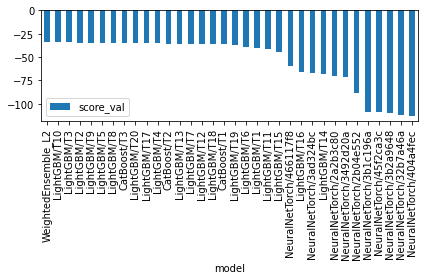

In [189]:
fig = predictor_hpo_3d.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val").figure
fig.tight_layout()
fig.savefig('img/exp_3d_leaderboard.png')

In [109]:
# Remember to set all negative values to zero
predictions_hpo_3d = predictor_hpo_3d.predict(test)
predictions_hpo_3d.describe()

count    6493.000000
mean      191.607224
std       173.620392
min       -17.750841
25%        46.533169
50%       149.707977
75%       284.303650
max       900.376465
Name: count, dtype: float64

In [110]:
(predictions_hpo_3d<0).sum()

89

In [111]:
predictions_hpo_3d = predictions_hpo_3d.apply(lambda x: 0 if x<0 else x)
predictions_hpo_3d.describe()

count    6493.000000
mean      191.643381
std       173.579907
min         0.000000
25%        46.533169
50%       149.707977
75%       284.303650
max       900.376465
Name: count, dtype: float64

In [112]:
submission_new_hpo_3d = pd.read_csv("sampleSubmission.csv")
# Same submitting predictions
submission_new_hpo_3d["count"] = predictions_hpo_3d
submission_new_hpo_3d.to_csv("submission_new_hpo_3d.csv", index=False)

In [113]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo_3d.csv -m "hp tuning 3d"

100%|█████████████████████████████████████████| 241k/241k [00:00<00:00, 527kB/s]
Successfully submitted to Bike Sharing Demand

In [114]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                        date                 description                                                                                                                                                                                                                                           status    publicScore  privateScore  
------------------------------  -------------------  ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  --------  -----------  ------------  
submission_new_hpo_3d.csv       2022-12-26 13:50:52  hp tuning 3d                                                                                                                                                                                                                                          complete  0.52253      0.52

#### New Score of 0.53176

### Experiment 3e: using stacking/ensembling + model tuning

In [115]:
import autogluon.core as ag

nn_options = {  
    'num_epochs': 10,  
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True), 
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  
}
gbm_options = {  
    'num_boost_round': ag.space.Int(lower = 100,  upper = 1000),
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36), 
}

rt_options = {
    'n_estimators': ag.space.Int(lower =150,upper=500)
}

xt_options = {
    'n_estimators': ag.space.Int(lower =150,upper=500)
}

cat_options = {
    'iterations': ag.space.Int(lower =1000,upper=10000)
}

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN_TORCH': nn_options,  # NOTE: comment this line out if you get errors on Mac OSX
                   'RF': rt_options,
                   'XT': xt_options,
        'CAT': cat_options,
                  }  # When these keys are missing from hyperparameters dict, no models of that type are trained



time_limit = 10*60  # train various models for ~2 min
num_trials = 20 # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'bayes'  # to tune hyperparameters using SKopt Bayesian optimization routine
    
label = 'count'
metric = 'root_mean_squared_error'
    
hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}


In [116]:
predictor_hpo_3e = TabularPredictor(
    label=label, 
    eval_metric=metric

).fit(
    train_data = train,
    auto_stack=True,
    num_stack_levels=1, 
    num_bag_folds=8, 
    num_bag_sets=5,
    time_limit=time_limit,
    hyperparameters=hyperparameters, 
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
)

No model was trained during hyperparameter tuning NeuralNetTorch_BAG_L2... Skipping this model.
Completed 1/5 k-fold bagging repeats ...
Fitting model: WeightedEnsemble_L3 ... Training model for up to 360.0s of the 74.96s of remaining time.
	-33.158	 = Validation score   (-root_mean_squared_error)
	0.38s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 525.63s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20221226_135054/")


In [117]:
predictor_hpo_3e.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2 -33.038009       0.001529  135.658681                0.000880           0.846915            2       True         15
1      WeightedEnsemble_L3 -33.158029       0.003626  385.054592                0.000834           0.378233            3       True         22
2       LightGBM_BAG_L2/T1 -33.484871       0.002360  292.803847                0.000132          25.689138            2       True         16
3     ExtraTrees_BAG_L2/T2 -33.565096       0.002403  283.678812                0.000175          16.564104            2       True         20
4       LightGBM_BAG_L1/T2 -33.609296       0.000131   33.872199                0.000131          33.872199            1       True          2
5     ExtraTrees_BAG_L2/T3 -33.730641       0.002363  277.433658                

{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'RandomForest_BAG_L1/T1': 'StackerEnsembleModel_RF',
  'RandomForest_BAG_L1/T2': 'StackerEnsembleModel_RF',
  'RandomForest_BAG_L1/T3': 'StackerEnsembleModel_RF',
  'RandomForest_BAG_L1/T4': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1/T1': 'StackerEnsembleModel_CatBoost',
  'ExtraTrees_BAG_L1/T1': 'StackerEnsembleModel_XT',
  'ExtraTrees_BAG_L1/T2': 'StackerEnsembleModel_XT',
  'ExtraTrees_BAG_L1/T3': 'StackerEnsembleModel_XT',
  'ExtraTrees_BAG_L1/T4': 'StackerEnsembleModel_XT',
  'ExtraTrees_BAG_L1/T5': 'StackerEnsembleModel_XT',
  'ExtraTrees_BAG_L1/T6': 'StackerEnsembleModel_XT',
  'ExtraTrees_BAG_L1/T7': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'RandomForest_BAG_L2/T1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2/T1': 'StackerEnsembleModel_CatBoost',
  'ExtraTrees_BAG_L

In [118]:
predictor_hpo_3e.leaderboard(silent=True)

model  score_val  pred_time_val    fit_time  \
0      WeightedEnsemble_L2 -33.038009       0.001529  135.658681   
1      WeightedEnsemble_L3 -33.158029       0.003626  385.054592   
2       LightGBM_BAG_L2/T1 -33.484871       0.002360  292.803847   
3     ExtraTrees_BAG_L2/T2 -33.565096       0.002403  283.678812   
4       LightGBM_BAG_L1/T2 -33.609296       0.000131   33.872199   
5     ExtraTrees_BAG_L2/T3 -33.730641       0.002363  277.433658   
6     ExtraTrees_BAG_L2/T1 -33.756812       0.002407  275.210723   
7       CatBoost_BAG_L2/T1 -33.821450       0.002318  317.492665   
8   RandomForest_BAG_L2/T1 -33.991969       0.002394  292.045161   
9       CatBoost_BAG_L1/T1 -36.826482       0.000135   71.848728   
10    ExtraTrees_BAG_L1/T6 -37.282208       0.000216   16.457945   
11    ExtraTrees_BAG_L1/T7 -37.387917       0.000124   14.057925   
12    ExtraTrees_BAG_L1/T5 -37.424838       0.000138   11.915664   
13    ExtraTrees_BAG_L1/T2 -37.427425       0.000157   10.959226   
14    ExtraTrees_BAG_L1/T4 -37.506339       0.000182    9.332303   
15    ExtraTrees_BAG_L1/T3 -37.648697       0.000166    6.704234   
16    ExtraTrees_BAG_L1/T1 -37.917176       0.000160    5.374717   
17  RandomForest_BAG_L1/T2 -38.254801       0.000247   21.524785   
18  RandomForest_BAG_L1/T4 -38.329116       0.000154   17.215766   
19  RandomForest_BAG_L1/T3 -38.341621       0.000166   12.632894   
20  RandomForest_BAG_L1/T1 -38.490504       0.000159    9.875644   
21      LightGBM_BAG_L1/T1 -39.654394       0.000092   25.342679   

    pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                 0.000880           0.846915            2       True   
1                 0.000834           0.378233            3       True   
2                 0.000132          25.689138            2       True   
3                 0.000175          16.564104            2       True   
4                 0.000131          33.872199            1       True   
5                 0.000135          10.318949            2       True   
6                 0.000179           8.096014            2       True   
7                 0.000090          50.377956            2       True   
8                 0.000166          24.930453            2       True   
9                 0.000135          71.848728            1       True   
10                0.000216          16.457945            1       True   
11                0.000124          14.057925            1       True   
12                0.000138          11.915664            1       True   
13                0.000157          10.959226            1       True   
14                0.000182           9.332303            1       True   
15                0.000166           6.704234            1       True   
16                0.000160           5.374717            1       True   
17                0.000247          21.524785            1       True   
18                0.000154          17.215766            1       True   
19                0.000166          12.632894            1       True   
20                0.000159           9.875644            1       True   
21                0.000092          25.342679            1       True   

    fit_order  
0          15  
1          22  
2          16  
3          20  
4           2  
5          21  
6          19  
7          18  
8          17  
9           7  
10         13  
11         14  
12         12  
13          9  
14         11  
15         10  
16          8  
17          4  
18          6  
19          5  
20          3  
21          1

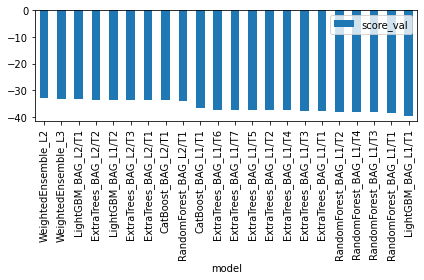

In [190]:
fig = predictor_hpo_3e.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val").figure
fig.tight_layout()
fig.savefig('img/exp_3e_leaderboard.png')

In [120]:
# Remember to set all negative values to zero
predictions_hpo_3e = predictor_hpo_3e.predict(test)
predictions_hpo_3e.describe()

count    6493.000000
mean      192.521133
std       173.963516
min        -9.803270
25%        47.315571
50%       151.798645
75%       285.074310
max       891.959351
Name: count, dtype: float64

In [121]:
(predictions_hpo_3e<0).sum()

59

In [122]:
predictions_hpo_3e = predictions_hpo_3e.apply(lambda x: 0 if x<0 else x)
predictions_hpo_3e.describe()

count    6493.000000
mean      192.541119
std       173.941145
min         0.000000
25%        47.315571
50%       151.798645
75%       285.074310
max       891.959351
Name: count, dtype: float64

In [123]:
submission_new_hpo_3e = pd.read_csv("sampleSubmission.csv")
# Same submitting predictions
submission_new_hpo_3e["count"] = predictions_hpo_3e
submission_new_hpo_3e.to_csv("submission_new_hpo_3e.csv", index=False)

In [124]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo_3e.csv -m "hp tuning 3e"

100%|█████████████████████████████████████████| 242k/242k [00:00<00:00, 487kB/s]
Successfully submitted to Bike Sharing Demand

In [126]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 10

fileName                        date                 description                                                                                                                                                                                                                                           status    publicScore  privateScore  
------------------------------  -------------------  ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  --------  -----------  ------------  
submission_new_hpo_3e.csv       2022-12-26 13:59:46  hp tuning 3e                                                                                                                                                                                                                                          complete  0.49307      0.49

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

In [ ]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [?, ?, ?]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

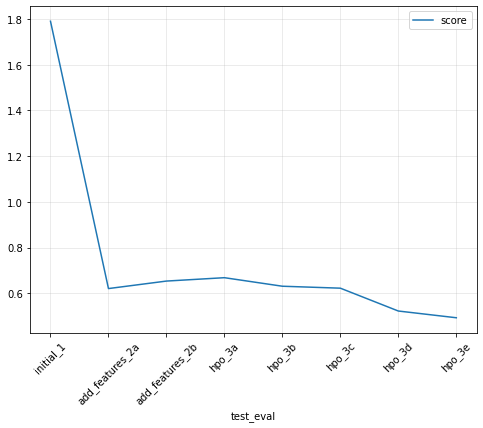

In [130]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial_1", "add_features_2a", "add_features_2b", "hpo_3a",  "hpo_3b", "hpo_3c","hpo_3d","hpo_3e"],
        "score": [1.79033, 0.62078, 0.65357, 0.66835, 0.63100, 0.62247, 0.52253, 0.49307 ]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
fig.savefig('img/model_test_score.png')

### Hyperparameter table

In [140]:
# The 3 hyperparameters we tuned with the kaggle score as the result
hpo_table = pd.DataFrame({
    "model": ["initial_1", "add_features_2a", "add_features_2b", "hpo_3a",  "hpo_3b", "hpo_3c","hpo_3d","hpo_3e"],
    "num_stack_levels": [1,1,1, 2, 1, 1, None,1],
    "num_bag_folds": [8, 8, 8, 8,10,8,None,8],
    "num_bag_sets": [20, 20, 20, 20,20,5,None,5],
    "models_hpo": ['default', "default", "default","default","default","default","default","optimized"],
    "score": [1.79033, 0.62078, 0.65357, 0.66835, 0.63100, 0.62247, 0.52253, 0.49307 ]
})

hpo_table

model  num_stack_levels  num_bag_folds  num_bag_sets models_hpo  \
0        initial_1               1.0            8.0          20.0    default   
1  add_features_2a               1.0            8.0          20.0    default   
2  add_features_2b               1.0            8.0          20.0    default   
3           hpo_3a               2.0            8.0          20.0    default   
4           hpo_3b               1.0           10.0          20.0    default   
5           hpo_3c               1.0            8.0           5.0    default   
6           hpo_3d               NaN            NaN           NaN    default   
7           hpo_3e               1.0            8.0           5.0  optimized   

     score  
0  1.79033  
1  0.62078  
2  0.65357  
3  0.66835  
4  0.63100  
5  0.62247  
6  0.52253  
7  0.49307